# AV Behavior Analysis in Mixed Urban Intersections using TGSIM Dataset

This notebook reproduces all analyses from our study of automated vehicle (AV) behavior using the TGSIM Foggy Bottom dataset. It includes trajectory visualization, zone-based interaction detection, and metric calculations such as Time-to-Collision (TTC), Post-Encroachment Time (PET), and headways. Results are compared against human-driven vehicles (HDVs) to highlight behavioral patterns across safety, interaction, and flow-related dimensions.


## Installing Dependencies
Required libraries: `pandas`, `matplotlib`, `numpy` and `seaborn`.

In [ ]:
!pip install pandas matplotlib numpy seaborn

## Transforming Coordinates
Converting pixel-based boundary polygons to meter units with Y-axis flipped to match bottom-left origin. Polygon boundaries can be found in `Foggy_Bottom_boundaries.txt`, but we've added them here anyway. 

In [8]:
# All boundary polygons (converted to meters) - reference is top-left corner of the image
polygons = {
    1: [(1625, 1633), (3090, 1633), (3090, 2465), (1625, 2465)],
    2: [(9389, 1663), (9607, 1290), (10280, 1290), (10280, 2590), (9588, 2812), (9389, 2467)],
    3: [(1550, 10241), (2800, 10241), (2800, 11041), (1550, 11041)],
    4: [(9369, 10297), (9558, 10099), (10247, 10201), (10247, 11077), (9525, 11046)],
    5: [(2225, 1), (2433, 1), (2425, 1294), (2215, 1294)],
    6: [(2217, 2815), (2191, 9911), (2399, 9911), (2423, 2815)],
    7: [(2179, 11400), (2371, 11400), (2343, 19400), (2151, 19400)],
    8: [(2433, 1), (2617, 1), (2607, 1294), (2425, 1294)],
    9: [(2423, 2815), (2399, 9911), (2601, 9911), (2625, 2815)],
    10: [(2571, 11400), (2540, 19400), (2343, 19400), (2371, 11400)],
    11: [(2803, 1), (2787, 1294), (2607, 1294), (2617, 1)],
    12: [(2783, 9911), (2805, 2815), (2625, 2815), (2601, 9911)],
    13: [(2571, 11400), (2763, 11400), (2743, 19400), (2540, 19400)],
    14: [(2225, 1), (2215, 1294), (2001, 1294), (2017, 1)],
    15: [(2217, 2815), (2191, 9911), (1977, 9911), (1999, 2815)],
    16: [(2179, 11400), (2151, 19400), (1949, 19400), (1979, 11400)],
    17: [(1805, 1), (1795, 1294), (2001, 1294), (2017, 1)],
    18: [(1770, 9911), (1803, 2815), (1999, 2815), (1977, 9911)],
    19: [(1979, 11400), (1949, 19400), (1759, 19400), (1779, 11400)],
    20: [(1805, 1), (1795, 1294), (1635, 1294), (1650, 1)],
    21: [(1770, 9911), (1803, 2815), (1615, 2815), (1595, 9911)],
    22: [(1779, 11400), (1759, 19400), (1579, 19400), (1595, 11400)],
    23: [(9600, 3177), (9800, 3111), (9788, 9863), (9578, 9829)],
    24: [(9568, 11294), (9786, 11304), (9766, 15818), (9550, 15818)],
    25: [(9800, 3111), (10044, 3029), (10028, 9901), (9788, 9863)],
    26: [(9786, 11304), (9994, 11301), (9978, 15818), (9766, 15818)],
    27: [(10044, 3029), (10270, 2953), (10260, 9937), (10028, 9901)],
    28: [(9994, 11301), (10216, 11320), (10202, 15818), (9978, 15818)],
    29: [(9030, 1681), (9030, 2045), (3460, 2053), (3460, 1670)],
    30: [(9030, 2045), (9030, 2453), (3460, 2453), (3460, 2053)],
    31: [(1, 10330), (1195, 10330), (1195, 10654), (1, 10654)],
    32: [(9094, 10314), (9166, 10642), (3165, 10642), (3165, 10314)],
    33: [(1, 10654), (1195, 10654), (1195, 10970), (1, 10970)],
    34: [(9166, 10642), (9234, 10990), (3165, 10990), (3165, 10642)],
    35: [(9560, 1290), (10300, 1290), (10300, 920), (9560, 920)],
    36: [(9588, 2812), (10280, 2590), (10280, 2946), (9588, 3180)],
    37: [(9389, 1663), (9389, 2467), (9030, 2467), (9030, 1663)],
    38: [(10280, 1615), (10550, 1615), (10550, 2560), (10280, 2560)],
    39: [(1595, 1633), (2880, 1633), (2880, 1294), (1595, 1294)],
    40: [(1595, 2465), (2880, 2465), (2880, 2815), (1595, 2815)],
    41: [(3090, 1633), (3460, 1633), (3460, 2490), (3090, 2490)],
    42: [(9558, 10099), (10330, 10211), (10330, 9950), (9558, 9830)],
    43: [(9525, 11046), (10275, 11077), (10270, 11320), (9532, 11294)],
    44: [(10247, 10258), (10498, 10247), (10498, 11077), (10247, 11077)],
    45: [(9369, 10297), (9510, 11016), (9244, 11016), (9092, 10297)],
    46: [(1550, 10241), (2820, 10241), (2820, 9911), (1550, 9911)],
    47: [(1540, 11041), (2820, 11041), (2820, 11400), (1540, 11400)],
    48: [(2800, 10287), (3165, 10287), (3165, 11015), (2800, 11015)],
    49: [(1550, 10270), (1550, 11025), (1195, 11025), (1195, 10270)],
}

# Extracting all Y-coordinates from the polygon dictionary
y_coords = [y for polygon in polygons.values() for _, y in polygon]

# Computing H as max Y - min Y, this is necessary for transformation to a bottom-left reference
H = max(y_coords) - min(y_coords)

# Converting polygon coordinates to meters and applying Y transformation
pixel_to_meter = 0.0186613838586
polygons_tr_m = {
    key: [(x * pixel_to_meter, (H - y) * pixel_to_meter) for x, y in value]
    for key, value in polygons.items()
}

Distances, speeds and accelerations are not pixel-based, so only transformation from top left origin to bottom left origin is needed here.

In [3]:
# Now transforming the coordinates and speeds for the entire dataset so the reference (0,0) is bottom-left

import pandas as pd

# Loading dataset
df = pd.read_csv("Third_Generation_Simulation_Data__TGSIM__Foggy_Bottom_Trajectories.csv")

# Converting H from the previous code cell to meters
H_meters = H * pixel_to_meter

# Applying transformations to y-coordinates, y-speeds and y-accelerations
df["yloc_kf"] = H_meters - df["yloc_kf"]
df["speed_kf_y"] = -df["speed_kf_y"]
df["acceleration_kf_y"] = -df["acceleration_kf_y"]

# Saving transformed dataset
df.to_csv("Transformed_TGSIM_Foggy_Bottom.csv", index=False)

## Trajectory Animation
This is an example animation for AVs, HDVs, pedestrians, and cyclists over a 30s window with overlaid boundary polygons.

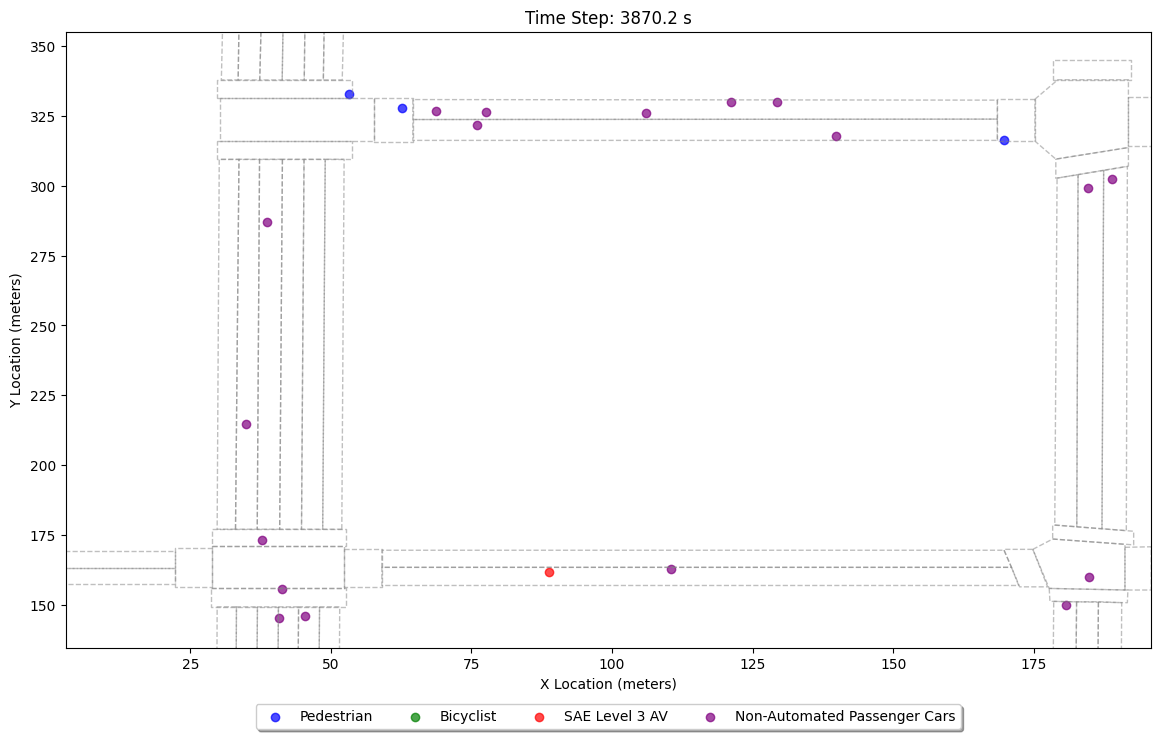

In [37]:
# This code generates an animation for peds, bikes, AV's and non-automated cars for a pre-selected duration
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Loading our transformed dataset
df = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Filtering so we only plot SAE Level 3 AVs, peds and bikes for a start
relevant_types = {
    0: "Pedestrian",
    1: "Bicyclist",
    3: "Non-Automated Passenger Cars",
    4: "SAE Level 3 AV",
}
df = df[df['type_most_common'].isin(relevant_types.keys())]

# Replacing numerical labels with text labels for our plots
df['type_label'] = df['type_most_common'].map(relevant_types)

# Sorting dataset by time for proper sequencing
df = df.sort_values(by="time")

# Now obtaining all unique time steps and sorting them for the animation
time_steps = sorted(df['time'].unique())

# Limiting the dataset to only 30 secs to avoid memory overload
start_time = time_steps[37800]  # 37800th recorded time step
end_time = start_time + 30  # 30 secs later
df = df[(df['time'] >= start_time) & (df['time'] <= end_time)]

# Updating time steps to reflect the reduced dataset
time_steps = sorted(df['time'].unique())

# Setting up figure
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(df['xloc_kf'].min(), df['xloc_kf'].max())
ax.set_ylim(df['yloc_kf'].min(), df['yloc_kf'].max())
ax.set_xlabel("X Location (meters)")
ax.set_ylabel("Y Location (meters)")
ax.set_title("Animated Trajectories with Boundaries")

# Overlay polygon boundaries
for lane_id, polygon in polygons_tr_m.items():
    polygon.append(polygon[0])  # Close the polygon
    x_poly, y_poly = zip(*polygon)
    ax.plot(x_poly, y_poly, linestyle="--", linewidth=1, color="gray", alpha=0.5)

# Create scatter plots for different road user types
scatter_plots = {}
colors = {"Pedestrian": "blue", "Bicyclist": "green", "SAE Level 3 AV": "red", "Non-Automated Passenger Cars": "purple"}
for type_label, color in colors.items():
    scatter_plots[type_label] = ax.scatter([], [], label=type_label, color=color, alpha=0.7)

# Adjusting legend placement
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=5)

# This is the update function for our animation
def update(frame):
    timestep = time_steps[frame]
    ax.set_title(f"Time Step: {timestep:.1f} s")

    # Filtering data for the current time step
    current_data = df[df['time'] == timestep]

    # Iterating over each road user type to update their positions
    for type_label, scatter in scatter_plots.items():
        subset = current_data[current_data['type_label'] == type_label]
        if not subset.empty:
            scatter.set_offsets(subset[['xloc_kf', 'yloc_kf']].values)
        else:
            scatter.set_offsets(np.array([]).reshape(0, 2))  # Ensure the type remains in the plot

# Creating and saving the animation
ani = animation.FuncAnimation(fig, update, frames=len(time_steps), interval=50)
ani.save("TGSIM_AV_Ped_Bike_Animation_4.gif", writer="pillow", fps=10)

# Show animation
plt.show()

## Tesla Vision Zones
Here, we define Tesla Vision-inspired detection zones by angular range and radius for spatial interaction analysis.

In [9]:
# Defining detection zones based on Tesla Vision

import pandas as pd
import numpy as np

tesla_zones = {
    "Wide Fwd": {"radius": 60, "angle": 120, "from": 300, "to": 60},
    "Main Fwd": {"radius": 150, "angle": 45, "from": 337.5, "to": 22.5},
    "Narrow Fwd": {"radius": 250, "angle": 35, "from": 342.5, "to": 17.5},
    "Side Fwd L": {"radius": 80, "angle": 90, "from": 25, "to": 115},
    "Side Fwd R": {"radius": 80, "angle": 90, "from": 245, "to": 335},
    "Rear": {"radius": 50, "angle": 135, "from": 112.5, "to": 247.5},
    "Side Rear L": {"radius": 100, "angle": 75, "from": 107.5, "to": 182.5},
    "Side Rear R": {"radius": 100, "angle": 75, "from": 177.5, "to": 252.5}
}

## Interaction Datasets
Now we're generating interaction and detection zone logs for both AVs and HDVs that performed a full left-turn sequence. Using Tesla Vision-style angular sectors and proximity thresholds, the code calculates which agents (e.g., pedestrians, cyclists) fall within each vehicle's detection zone at each timestep. Two JSON files are created per vehicle type: one logging time-stamped interactions (`*_Interaction_Log.json`) and another detailing the spatial relationships and zone assignments (`*_Detection_Details.json`), enabling downstream analysis of behavioral differences across road user types.

In [10]:
# Now we are creating our two datasets, one for interactions happening between each AV and other agents at each timestep 
# and another for where agent is located with respect to detection zones. 
# Update: assigning interactions as lists since strings don't seem to work - using JSON now.

import pandas as pd
import numpy as np
import json

# Loading our filtered dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Separating AVs
av_ids = tgsim[tgsim['type_most_common'] == 4]['id'].unique()

# All agents including AVs 
agent_data = tgsim[tgsim['type_most_common'].isin([0, 1, 2, 3, 4, 5, 6, 7])]

# Now getting unique time steps that exist in our dataset
time_steps = sorted(tgsim['time'].unique())

# Defining detection zones again based on Tesla Vision
tesla_zones = {
    "Wide Fwd": {"radius": 60, "angle": 120, "from": 300, "to": 60},
    "Main Fwd": {"radius": 150, "angle": 45, "from": 337.5, "to": 22.5},
    "Narrow Fwd": {"radius": 250, "angle": 35, "from": 342.5, "to": 17.5},
    "Side Fwd L": {"radius": 80, "angle": 90, "from": 25, "to": 115},
    "Side Fwd R": {"radius": 80, "angle": 90, "from": 245, "to": 335},
    "Rear": {"radius": 50, "angle": 135, "from": 112.5, "to": 247.5},
    "Side Rear L": {"radius": 100, "angle": 75, "from": 107.5, "to": 182.5},
    "Side Rear R": {"radius": 100, "angle": 75, "from": 177.5, "to": 252.5}
}

# Ensures angles are in [0, 360] range
def normalize_angle(angle):
    return angle % 360

# Computes relative angle and Euclidean distance
def compute_relative_angle(av, agent):
    dx = agent["xloc_kf"] - av["xloc_kf"]
    dy = agent["yloc_kf"] - av["yloc_kf"]
    
    distance = np.sqrt(dx**2 + dy**2)
    angle = np.degrees(np.arctan2(dy, dx))  
    angle = normalize_angle(angle)  

    return angle, distance

# Determines detection zones based on angle and distance
def detect_zones(relative_angle, distance, tesla_zones):
    detected_zones = []
    rel_angle = normalize_angle(relative_angle)

    for zone, params in tesla_zones.items():
        from_angle, to_angle = params["from"], params["to"]

        # Handling cases where the zone wraps around 360 degrees
        if from_angle > to_angle:
            within_angle = (rel_angle >= from_angle or rel_angle <= to_angle)
        else:
            within_angle = (from_angle <= rel_angle <= to_angle)

        if within_angle and distance <= params["radius"]:
            detected_zones.append(zone)

    return detected_zones

# Initializing storage for our two datasets
interaction_log_data = []
detection_details = []

# Processing each time step
for timestep in time_steps:
    av_positions = tgsim[(tgsim['time'] == timestep) & (tgsim['type_most_common'] == 4)]
    agent_positions = agent_data[agent_data['time'] == timestep]

    for av_id in av_ids:
        av_row = av_positions[av_positions['id'] == av_id]
        if av_row.empty:
            continue

        av_row = av_row.iloc[0]
        interacting_agents = []

        for _, agent_row in agent_positions.iterrows():
            agent_id = agent_row['id']
            relative_angle, distance = compute_relative_angle(av_row, agent_row)

            if distance < 0.01:
                continue

            detected_zones = detect_zones(relative_angle, distance, tesla_zones)

            if detected_zones:
                interacting_agents.append(int(agent_id))
                detection_details.append({
                    "time": float(timestep),
                    "av_id": int(av_id),
                    "agent_id": int(agent_id),
                    "zones": detected_zones,  
                    "distance": float(distance)
                })

        if interacting_agents:
            interaction_log_data.append({
                "time": float(timestep),
                "av_id": int(av_id),
                "agent_ids": interacting_agents
            })

    if timestep % 100 == 0:
        print(f"Processed time {timestep}")

# Save datasets as JSON with proper formatting
with open("AV_Interaction_Log.json", "w") as f:
    json.dump(interaction_log_data, f, indent=2)

with open("AV_Detection_Details.json", "w") as f:
    json.dump(detection_details, f, indent=2)

print("Processing complete. Datasets saved as JSON.")

Processed time 100.0
Processed time 200.0
Processed time 300.0
Processed time 400.0
Processed time 500.0
Processed time 600.0
Processed time 700.0
Processed time 800.0
Processed time 900.0
Processed time 1000.0
Processed time 1100.0
Processed time 1200.0
Processed time 1300.0
Processed time 1400.0
Processed time 1500.0
Processed time 1600.0
Processed time 1700.0
Processed time 1800.0
Processed time 1900.0
Processed time 2000.0
Processed time 2100.0
Processed time 2200.0
Processed time 2300.0
Processed time 2400.0
Processed time 2500.0
Processed time 2600.0
Processed time 2700.0
Processed time 2800.0
Processed time 2900.0
Processed time 3000.0
Processed time 3100.0
Processed time 3200.0
Processed time 3300.0
Processed time 3400.0
Processed time 3500.0
Processed time 3600.0
Processed time 3700.0
Processed time 3800.0
Processed time 3900.0
Processed time 4000.0
Processed time 4100.0
Processed time 4200.0
Processed time 4300.0
Processed time 4400.0
Processed time 4500.0
Processed time 4600

In [11]:
# Creating interaction and detection datasets for HDVs (CVs) that made at least one left turn similar to AV path

import pandas as pd
import numpy as np
import json

# Loading dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Filtering HDVs that made at least one key left-turn 
hdv_df = tgsim[tgsim["type_most_common"] == 3]  # Only cars for comparison purposes
hdv_ids = set()

# Condition 1: 25 to 29
c1 = hdv_df[hdv_df["lane_kf"] == 25]["id"].unique()
c2 = hdv_df[hdv_df["lane_kf"] == 29]["id"].unique()
hdv_ids.update(set(c1).intersection(c2))

# Condition 2: 29 to 15
c1 = hdv_df[hdv_df["lane_kf"] == 29]["id"].unique()
c2 = hdv_df[hdv_df["lane_kf"] == 15]["id"].unique()
hdv_ids.update(set(c1).intersection(c2))        # this automatically eliminates duplicates :)

# Condition 3: 15 to 34
c1 = hdv_df[hdv_df["lane_kf"] == 15]["id"].unique()
c2 = hdv_df[hdv_df["lane_kf"] == 34]["id"].unique()
hdv_ids.update(set(c1).intersection(c2))

# Condition 4: 34 to 25
c1 = hdv_df[hdv_df["lane_kf"] == 34]["id"].unique()
c2 = hdv_df[hdv_df["lane_kf"] == 25]["id"].unique()
hdv_ids.update(set(c1).intersection(c2))

# Converting to list
hdv_ids = list(hdv_ids)

# All agents (pedestrians, bikes, etc.)
agent_data = tgsim[tgsim["type_most_common"].isin([0, 1, 2, 3, 4, 5, 6, 7])]

# Unique time steps
time_steps = sorted(tgsim["time"].unique())

# Tesla-style detection zones
tesla_zones = {
    "Wide Fwd": {"radius": 60, "from": 300, "to": 60},
    "Main Fwd": {"radius": 150, "from": 337.5, "to": 22.5},
    "Narrow Fwd": {"radius": 250, "from": 342.5, "to": 17.5},
    "Side Fwd L": {"radius": 80, "from": 25, "to": 115},
    "Side Fwd R": {"radius": 80, "from": 245, "to": 335},
    "Rear": {"radius": 50, "from": 112.5, "to": 247.5},
    "Side Rear L": {"radius": 100, "from": 107.5, "to": 182.5},
    "Side Rear R": {"radius": 100, "from": 177.5, "to": 252.5}
}

# Normalize angles
def normalize_angle(angle):
    return angle % 360

# Compute relative angle and distance
def compute_relative_angle(hdv, agent):
    dx = agent["xloc_kf"] - hdv["xloc_kf"]
    dy = agent["yloc_kf"] - hdv["yloc_kf"]
    distance = np.sqrt(dx**2 + dy**2)
    angle = np.degrees(np.arctan2(dy, dx))
    return normalize_angle(angle), distance

# Determine zones
def detect_zones(angle, distance):
    zones = []
    for name, params in tesla_zones.items():
        a_from, a_to = params["from"], params["to"]
        within_angle = angle >= a_from or angle <= a_to if a_from > a_to else a_from <= angle <= a_to
        if within_angle and distance <= params["radius"]:
            zones.append(name)
    return zones

# Initializing our logs
interaction_log_data = []
detection_details = []

# Processing each time step
for timestep in time_steps:
    hdv_positions = df[(df["time"] == timestep) & (df["id"].isin(hdv_ids))]
    agent_positions = agent_data[agent_data["time"] == timestep]

    for _, hdv_row in hdv_positions.iterrows():
        hdv_id = int(hdv_row["id"])
        interacting_agents = []

        for _, agent_row in agent_positions.iterrows():
            agent_id = int(agent_row["id"])
            angle, distance = compute_relative_angle(hdv_row, agent_row)

            if distance < 0.01:
                continue

            zones = detect_zones(angle, distance)
            if zones:
                interacting_agents.append(agent_id)
                detection_details.append({
                    "time": float(timestep),
                    "hdv_id": hdv_id,
                    "agent_id": agent_id,
                    "zones": zones,
                    "distance": float(distance)
                })

        if interacting_agents:
            interaction_log_data.append({
                "time": float(timestep),
                "hdv_id": hdv_id,
                "agent_ids": interacting_agents
            })

    if timestep % 100 == 0:
        print(f"Processed time {timestep}")

# Saving
with open("HDV_Interaction_Log.json", "w") as f:
    json.dump(interaction_log_data, f, indent=2)

with open("HDV_Detection_Details.json", "w") as f:
    json.dump(detection_details, f, indent=2)

print("Done saving HDV interaction and detection logs.")

Processed time 100.0
Processed time 200.0
Processed time 300.0
Processed time 400.0
Processed time 500.0
Processed time 600.0
Processed time 700.0
Processed time 800.0
Processed time 900.0
Processed time 1000.0
Processed time 1100.0
Processed time 1200.0
Processed time 1300.0
Processed time 1400.0
Processed time 1500.0
Processed time 1600.0
Processed time 1700.0
Processed time 1800.0
Processed time 1900.0
Processed time 2000.0
Processed time 2100.0
Processed time 2200.0
Processed time 2300.0
Processed time 2400.0
Processed time 2500.0
Processed time 2600.0
Processed time 2700.0
Processed time 2800.0
Processed time 2900.0
Processed time 3000.0
Processed time 3100.0
Processed time 3200.0
Processed time 3300.0
Processed time 3400.0
Processed time 3500.0
Processed time 3600.0
Processed time 3700.0
Processed time 3800.0
Processed time 3900.0
Processed time 4000.0
Processed time 4100.0
Processed time 4200.0
Processed time 4300.0
Processed time 4400.0
Processed time 4500.0
Processed time 4600

## TEC Analysis
Here, we're computing Time-to-Collision (TTC) values between vehicles (AVs and selected HDVs) and nearby agents using relative kinematics. For each timestep and each pair of interacting agents:
- The relative displacement and velocity vectors are calculated.
- These vectors are projected to compute the rate of closing distance (`V_rel`).
- TTC is defined as `distance / V_rel`, with special handling for divergence (`V_rel ≤ 0`) or direct overlap (`distance = 0`).

Separate CSV files are saved for AVs (`AV_TTC_Analysis.csv`) and HDVs (`HDV_TTC_Analysis.csv`) for later analyses and visualizations.


In [12]:
# Calculating TTC for AVs and storing values in a new dataset

import pandas as pd
import numpy as np

# Loading datasets
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")  
with open("AV_Interaction_Log.json", "r") as f:
    interaction_log = pd.DataFrame(json.load(f))  
with open("AV_Detection_Details.json", "r") as f:
    detection_details = pd.DataFrame(json.load(f))  

# Merging detection details with the original dataset to get speeds
df_ttc = detection_details.merge(tgsim, left_on=["time", "av_id"], right_on=["time", "id"], suffixes=("_det", "_av"))
df_ttc = df_ttc.merge(tgsim, left_on=["time", "agent_id"], right_on=["time", "id"], suffixes=("_av", "_agent"))

# Computing relative speed components
df_ttc["dx"] = df_ttc["xloc_kf_agent"] - df_ttc["xloc_kf_av"]
df_ttc["dy"] = df_ttc["yloc_kf_agent"] - df_ttc["yloc_kf_av"]
df_ttc["distance"] = np.sqrt(df_ttc["dx"]**2 + df_ttc["dy"]**2)

# Unit direction vectors
df_ttc["unit_x"] = df_ttc["dx"] / df_ttc["distance"]
df_ttc["unit_y"] = df_ttc["dy"] / df_ttc["distance"]

# Relative velocity components
df_ttc["V_rel_x"] = df_ttc["speed_kf_x_agent"] - df_ttc["speed_kf_x_av"]
df_ttc["V_rel_y"] = df_ttc["speed_kf_y_agent"] - df_ttc["speed_kf_y_av"]

# Projecting relative velocity onto direction vector
df_ttc["V_rel"] = df_ttc["V_rel_x"] * df_ttc["unit_x"] + df_ttc["V_rel_y"] * df_ttc["unit_y"]

# Computing TTC (handling edge cases)
df_ttc["TTC"] = df_ttc["distance"] / df_ttc["V_rel"]
df_ttc.loc[df_ttc["V_rel"] <= 0, "TTC"] = np.inf  # No impending collision
df_ttc.loc[df_ttc["distance"] == 0, "TTC"] = 0  # Immediate collision

# Selecting relevant columns
df_ttc = df_ttc[["time", "av_id", "agent_id", "distance", "V_rel", "TTC", "zones"]]

# Saving the dataset
df_ttc.to_csv("AV_TTC_Analysis.csv", index=False)

print("TTC dataset saved as 'AV_TTC_Analysis.csv'")


TTC dataset saved as 'AV_TTC_Analysis.csv'


In [13]:
# Calculating TTC for left turning HDVs and storing values in a new dataset

import pandas as pd
import numpy as np
import json

# Load datasets
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")
with open("HDV_Interaction_Log.json", "r") as f:
    interaction_log = pd.DataFrame(json.load(f))
with open("HDV_Detection_Details.json", "r") as f:
    detection_details = pd.DataFrame(json.load(f))

# Merge detection details with the original dataset to get speeds and positions
df_ttc = detection_details.merge(tgsim, left_on=["time", "hdv_id"], right_on=["time", "id"], suffixes=("_det", "_hdv"))
df_ttc = df_ttc.merge(tgsim, left_on=["time", "agent_id"], right_on=["time", "id"], suffixes=("_hdv", "_agent"))

# Compute relative position
df_ttc["dx"] = df_ttc["xloc_kf_agent"] - df_ttc["xloc_kf_hdv"]
df_ttc["dy"] = df_ttc["yloc_kf_agent"] - df_ttc["yloc_kf_hdv"]
df_ttc["distance"] = np.sqrt(df_ttc["dx"]**2 + df_ttc["dy"]**2)

# Normalize direction vector
df_ttc["unit_x"] = df_ttc["dx"] / df_ttc["distance"]
df_ttc["unit_y"] = df_ttc["dy"] / df_ttc["distance"]

# Compute relative velocity
df_ttc["V_rel_x"] = df_ttc["speed_kf_x_agent"] - df_ttc["speed_kf_x_hdv"]
df_ttc["V_rel_y"] = df_ttc["speed_kf_y_agent"] - df_ttc["speed_kf_y_hdv"]
df_ttc["V_rel"] = df_ttc["V_rel_x"] * df_ttc["unit_x"] + df_ttc["V_rel_y"] * df_ttc["unit_y"]

# Compute TTC
df_ttc["TTC"] = df_ttc["distance"] / df_ttc["V_rel"]
df_ttc.loc[df_ttc["V_rel"] <= 0, "TTC"] = np.inf  # No collision or receding
df_ttc.loc[df_ttc["distance"] == 0, "TTC"] = 0  # Immediate collision

# Select and save relevant columns
df_ttc = df_ttc[["time", "hdv_id", "agent_id", "distance", "V_rel", "TTC", "zones"]]
df_ttc.to_csv("HDV_TTC_Analysis.csv", index=False)

print("TTC dataset saved as 'HDV_TTC_Analysis.csv'")


TTC dataset saved as 'HDV_TTC_Analysis.csv'


## PET Analysis

This code calculates the Post-Encroachment Time (PET) for each AV–VRU and HDV–VRU interaction. PET is defined as the absolute time difference between when each agent (vehicle and pedestrian/cyclist) reaches their point of closest proximity. 

Key steps:
- Only AV–VRU and HDV–VRU pairs that came within 5 meters of each other are considered (you may change this threshold).
- For each qualifying pair, all possible combinations of their time-resolved positions are compared to find the closest approach.
- PET is computed as the time difference between the AV (or HDV) and the VRU when that minimum separation occurred.

Separate datasets are saved as:
- `AV_PET_Analysis_5m.csv` for automated vehicles,
- `HDV_PET_Analysis_5m.csv` for human-driven vehicles.


In [14]:
# Calculating PET (Post-Encroachment Time) for left-turning AVs and storing values in a new dataset
# Each row represents the PET for a single AV-VRU pair
# PET is the absolute time difference between when each was at their closest point to the other
# If the closest they ever got was more than 5 meters, the pair is skipped

import pandas as pd
import numpy as np
import json

# Loading relevant data
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")
with open("AV_Interaction_Log.json", "r") as f:
    interaction_log = pd.DataFrame(json.load(f))

# Filtering for VRUs
vru_types = [0, 1, 2]
tgsim_vru = tgsim[tgsim["type_most_common"].isin(vru_types)]
tgsim_av = tgsim[tgsim["type_most_common"] == 4]

# Explode agent_ids so that each row has one agent
interaction_log = interaction_log.explode("agent_ids")
interaction_log = interaction_log.rename(columns={"agent_ids": "agent_id"})

# Creating unique AV-VRU pairs from interaction log
interaction_log["interaction_id"] = interaction_log["av_id"].astype(str) + "_" + interaction_log["agent_id"].astype(str)
interaction_pairs = interaction_log[["av_id", "agent_id"]].drop_duplicates()

# Now calculating PET
pet_list = []

for _, row in interaction_pairs.iterrows():
    av_id = row["av_id"]
    agent_id = row["agent_id"]

    av_traj = tgsim_av[tgsim_av["id"] == av_id][["time", "xloc_kf", "yloc_kf"]].copy()
    agent_traj = tgsim_vru[tgsim_vru["id"] == agent_id][["time", "xloc_kf", "yloc_kf"]].copy()

    # Skip if either trajectory is empty
    if av_traj.empty or agent_traj.empty:
        continue

    # Creating all possible combinations of locations for the AV-VRU pair
    av_traj["key"] = 1
    agent_traj["key"] = 1
    merged = pd.merge(av_traj, agent_traj, on="key", suffixes=("_av", "_agent")).drop("key", axis=1)

    # Computing distance for all combinations
    merged["distance"] = np.sqrt((merged["xloc_kf_av"] - merged["xloc_kf_agent"])**2 +
                                 (merged["yloc_kf_av"] - merged["yloc_kf_agent"])**2)

    if merged["distance"].min() > 5:
        continue  # skip if their trajectories never come within 5m from one another

    # PET determination based on when min distance happened for both agents
    encroachment = merged.loc[merged["distance"].idxmin()]
    t_av = encroachment["time_av"]
    t_agent = encroachment["time_agent"]
    pet = abs(t_av - t_agent)

    pet_list.append({
        "av_id": av_id,
        "agent_id": agent_id,
        "av_time": t_av,
        "agent_time": t_agent,
        "PET": pet
    })

# Save results
df_pet = pd.DataFrame(pet_list)
df_pet.to_csv("AV_PET_Analysis_5m.csv", index=False)
print("PET dataset saved as 'AV_PET_Analysis.csv'")


PET dataset saved as 'AV_PET_Analysis.csv'


In [15]:
# Calculating PET (Post-Encroachment Time) for left-turning HDVs and storing values in a new dataset
# Each row represents the PET for a single HDV-VRU pair
# PET is the absolute time difference between when each was at their closest point to the other
# If the closest they ever got was more than 5 meters, the pair is skipped

import pandas as pd
import numpy as np
import json

# Loading relevant  data
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")
with open("HDV_Interaction_Log.json", "r") as f:
    interaction_log = pd.DataFrame(json.load(f))

# Filtering for VRUs
vru_types = [0, 1, 2]
tgsim_vru = tgsim[tgsim["type_most_common"].isin(vru_types)]
tgsim_hdv = tgsim[tgsim["type_most_common"] == 3]

# Explode agent_ids so that each row has one agent
interaction_log = interaction_log.explode("agent_ids")
interaction_log = interaction_log.rename(columns={"agent_ids": "agent_id"})

# Crating unique HDV-VRU pairs from interaction log
interaction_log["interaction_id"] = interaction_log["hdv_id"].astype(str) + "_" + interaction_log["agent_id"].astype(str)
interaction_pairs = interaction_log[["hdv_id", "agent_id"]].drop_duplicates()

# Now calculating PET
pet_list = []

for _, row in interaction_pairs.iterrows():
    hdv_id = row["hdv_id"]
    agent_id = row["agent_id"]

    hdv_traj = tgsim_hdv[tgsim_hdv["id"] == hdv_id][["time", "xloc_kf", "yloc_kf"]].copy()
    agent_traj = tgsim_vru[tgsim_vru["id"] == agent_id][["time", "xloc_kf", "yloc_kf"]].copy()

    # Skip if either trajectory is empty
    if hdv_traj.empty or agent_traj.empty:
        continue

    # Creating all possible combinations of locations for the hdv_vru pair
    hdv_traj["key"] = 1
    agent_traj["key"] = 1
    merged = pd.merge(hdv_traj, agent_traj, on="key", suffixes=("_hdv", "_agent")).drop("key", axis=1)

    # Computing distance for all combinations
    merged["distance"] = np.sqrt((merged["xloc_kf_hdv"] - merged["xloc_kf_agent"])**2 +
                                 (merged["yloc_kf_hdv"] - merged["yloc_kf_agent"])**2)

    if merged["distance"].min() > 5:
        continue  # skip if their trajectories never come within 5m from one another

    # PET determination based on when min distance happened for both agents
    encroachment = merged.loc[merged["distance"].idxmin()]
    t_hdv = encroachment["time_hdv"]
    t_agent = encroachment["time_agent"]
    pet = abs(t_hdv - t_agent)

    pet_list.append({
        "hdv_id": hdv_id,
        "agent_id": agent_id,
        "hdv_time": t_hdv,
        "agent_time": t_agent,
        "PET": pet
    })

# Save results
df_pet = pd.DataFrame(pet_list)
df_pet.to_csv("HDV_PET_Analysis_5m.csv", index=False)
print("PET dataset saved as 'HDV_PET_Analysis.csv'")


PET dataset saved as 'HDV_PET_Analysis.csv'


## AV-Led Platoon Detection Using Affine Spacing
This cell identifies AV-led platoons based on affine spacing conditions during four defined left-turn transitions. It extracts the lead AVs, detects their entry time into a predefined polygon zone, and builds follower lists by checking headway-based spacing criteria. The result is a dataframe listing each AV, its transition path, and IDs of valid followers satisfying the spacing condition. Output is saved as `All_AV_Platoons.csv`.

In [16]:
# Now determining platoon ends based on affine spacing and storing platoon details and members IDs in a new df

import pandas as pd
import numpy as np

# Loading transformed dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Keeping only vehicle types (3–7)
tgsim = tgsim[tgsim["type_most_common"].isin([3, 4, 5, 6, 7])].copy()
tgsim.sort_values(["id", "time"], inplace=True)

# Lane transitions and the detection polygon each AV must pass through
lane_transitions = [
    (25, 29, 36),  # top-right
    (29, 15, 41),  # top-left
    (15, 34, 46),  # bottom-left
    (34, 25, 45)   # bottom-right
]

# Affine spacing parameters (from literature)
tolerance = 3.5
av_h, av_d0 = 1.0, 3.0
hdv_h, hdv_d0 = 2.0, 6.0

records = []

for source_lane, target_lane, detect_lane in lane_transitions:
    # Identify AVs that made the full turn from source to target lane
    av_ids_source = set(tgsim[tgsim["lane_kf"] == source_lane]["id"])
    av_ids_target = set(tgsim[tgsim["lane_kf"] == target_lane]["id"])
    av_ids = [vid for vid in av_ids_source & av_ids_target if tgsim[tgsim["id"] == vid]["type_most_common"].iloc[0] == 4]

    for av_id in av_ids:
        av_traj = tgsim[tgsim["id"] == av_id]
        if detect_lane not in av_traj["lane_kf"].values:
            continue

        # AV detection time and speed (at moment of entry into detection zone)
        av_entry_time = av_traj[av_traj["lane_kf"] == detect_lane]["time"].min()
        av_first = av_traj[(av_traj["lane_kf"] == detect_lane) & (av_traj["time"] == av_entry_time)]
        vx_av = av_first["speed_kf_x"].values[0]
        vy_av = av_first["speed_kf_y"].values[0]
        speed_av = np.sqrt(vx_av**2 + vy_av**2)
        if pd.isna(speed_av) or speed_av == 0:
            continue

        platoon = []

        # All IDs that appeared in detection zone after the AV's crossing
        other_ids = tgsim[(tgsim["lane_kf"] == detect_lane) & (tgsim["time"] > av_entry_time) & (tgsim["id"] != av_id)]["id"].unique()

        for fid in other_ids:
            follower_traj = tgsim[tgsim["id"] == fid]

            # Must have passed through source lane (to filter out wrong direction)
            if source_lane not in follower_traj["lane_kf"].values:
                continue

            # Time the follower enters detection zone
            t_f = follower_traj[follower_traj["lane_kf"] == detect_lane]["time"].min()
            if t_f > av_entry_time + 60:
                continue

            # Get speed at moment of entry into detection zone (not averaged!)
            f_first = follower_traj[(follower_traj["lane_kf"] == detect_lane) & (follower_traj["time"] == t_f)]
            if f_first.empty:
                continue

            vx = f_first["speed_kf_x"].values[0]
            vy = f_first["speed_kf_y"].values[0]
            v_f = np.sqrt(vx**2 + vy**2)

            if pd.isna(v_f) or v_f == 0:
                continue

            veh_type = follower_traj["type_most_common"].iloc[0]
            h, d0 = (av_h, av_d0) if veh_type == 4 else (hdv_h, hdv_d0)

            d_actual = (t_f - av_entry_time) * v_f
            d_desired = d0 + h * v_f

            # Follower qualifies if they did not fall too far behind desired headway
            if d_actual <= d_desired + tolerance:
                platoon.append(fid)
            else:
                break  # platoon ends when follower fails spacing condition

        records.append({
            "lead_id": av_id,
            "source_lane": source_lane,
            "target_lane": target_lane,
            "detect_lane": detect_lane,
            "av_entry_time": av_entry_time,
            "platoon_member_ids": platoon,
            "platoon_size": len(platoon)
        })

# Convert records to DataFrame
platoon_df = pd.DataFrame(records)

# Save output
platoon_df.to_csv("All_AV_Platoons.csv", index=False)


## Sampling and Detecting HDV-Led Platoons (Affine Spacing Logic)
This cell mirrors the AV logic but targets HDVs. We first extract HDVs that completed full left-turn trajectories through all key lanes, then randomly sample 100 leads. For each lead, we determine the size and members of their downstream platoon using the same affine spacing logic, adapted for vehicle type. The final output lists sampled HDV platoons in `Sampled_HDV_Platoons.csv`.

In [17]:
import pandas as pd
import numpy as np

# Loading transformed dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Keeping only vehicle types (3–7)
tgsim = tgsim[tgsim["type_most_common"].isin([3, 4, 5, 6, 7])].copy()
tgsim.sort_values(["id", "time"], inplace=True)

# Lane transitions and the detection polygon each HDV must pass through
lane_transitions = [
    (25, 29, 36),  # top-right
    (29, 15, 41),  # top-left
    (15, 34, 46),  # bottom-left
    (34, 25, 45)   # bottom-right
]

# Affine spacing parameters (from literature)
tolerance = 3.5
av_h, av_d0 = 1.0, 3.0
hdv_h, hdv_d0 = 2.0, 6.0

records = []

# Step 1: Identify all HDVs that made a full left turn through an intersection
eligible_hdv_ids = []

for source_lane, target_lane, detect_lane in lane_transitions:
    ids_source = set(tgsim[tgsim["lane_kf"] == source_lane]["id"])
    ids_target = set(tgsim[tgsim["lane_kf"] == target_lane]["id"])
    ids_detect = set(tgsim[tgsim["lane_kf"] == detect_lane]["id"])
    
    valid_ids = ids_source & ids_target & ids_detect
    valid_hdvs = [vid for vid in valid_ids if tgsim[tgsim["id"] == vid]["type_most_common"].iloc[0] != 4]
    
    for hdv_id in valid_hdvs:
        eligible_hdv_ids.append((hdv_id, source_lane, target_lane, detect_lane))

# Step 2: Randomly sample 50 eligible HDV leads (we can scale this later)
np.random.seed(99)
sampled = np.random.choice(len(eligible_hdv_ids), size=100, replace=False)
sampled_hdv_leads = [eligible_hdv_ids[i] for i in sampled]

# Step 3: Determine platoon ends using affine spacing, as in AV logic
for hdv_id, source_lane, target_lane, detect_lane in sampled_hdv_leads:
    hdv_traj = tgsim[tgsim["id"] == hdv_id]
    if detect_lane not in hdv_traj["lane_kf"].values:
        continue

    # HDV detection time and speed (at moment of entry into detection zone)
    entry_time = hdv_traj[hdv_traj["lane_kf"] == detect_lane]["time"].min()
    entry_row = hdv_traj[(hdv_traj["lane_kf"] == detect_lane) & (hdv_traj["time"] == entry_time)]
    vx = entry_row["speed_kf_x"].values[0]
    vy = entry_row["speed_kf_y"].values[0]
    speed = np.sqrt(vx**2 + vy**2)
    if pd.isna(speed) or speed == 0:
        continue

    platoon = []

    # All IDs that appeared in detection zone after the HDV's crossing
    other_ids = tgsim[(tgsim["lane_kf"] == detect_lane) & 
                      (tgsim["time"] > entry_time) &
                      (tgsim["id"] != hdv_id)]["id"].unique()

    for fid in other_ids:
        follower_traj = tgsim[tgsim["id"] == fid]

        # Must have passed through source lane (to filter out wrong direction)
        if source_lane not in follower_traj["lane_kf"].values:
            continue

        # Time the follower enters detection zone
        t_f = follower_traj[follower_traj["lane_kf"] == detect_lane]["time"].min()
        if t_f > entry_time + 60:
            continue

        # Get speed at moment of entry into detection zone (not averaged!)
        f_first = follower_traj[(follower_traj["lane_kf"] == detect_lane) & (follower_traj["time"] == t_f)]
        if f_first.empty:
            continue

        vx = f_first["speed_kf_x"].values[0]
        vy = f_first["speed_kf_y"].values[0]
        v_f = np.sqrt(vx**2 + vy**2)
        if pd.isna(v_f) or v_f == 0:
            continue

        # Spacing parameters depend on follower type
        veh_type = follower_traj["type_most_common"].iloc[0]
        h, d0 = (av_h, av_d0) if veh_type == 4 else (hdv_h, hdv_d0)

        d_actual = (t_f - entry_time) * v_f
        d_desired = d0 + h * v_f

        # Follower qualifies if they did not fall too far behind desired headway
        if d_actual <= d_desired + tolerance:
            platoon.append(fid)
        else:
            break  # platoon ends when follower fails spacing condition

    records.append({
        "lead_id": hdv_id,
        "source_lane": source_lane,
        "target_lane": target_lane,
        "detect_lane": detect_lane,
        "lead_entry_time": entry_time,
        "platoon_member_ids": platoon,
        "platoon_size": len(platoon)
    })

# Convert to DataFrame
platoon_df = pd.DataFrame(records)

# Save output
platoon_df.to_csv("Sampled_HDV_Platoons.csv", index=False)


## String Stability Evaluation for AV- and HDV-Led Platoons

This section evaluates string stability in mixed-traffic platoons led by automated (AV) and human-driven (HDV) vehicles. For each platoon, we extract raw acceleration signals for the leader and each follower over a ±5 second window centered on their entry into the detection zone. Acceleration norms are computed and used to calculate gain values. Gain is the ratio between a follower's norm and that of its immediate leader.

- For AV-led platoons, the analysis covers all detected sequences from the full dataset, with results stored in `AV_String_Stability_Results.csv`.
- For HDV-led platoons, the same logic is applied to 100 randomly sampled leads, saved as `HDV_String_Stability_Results.csv`.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load transformed TGSIM dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Keep only vehicle types (3–7)
tgsim = tgsim[tgsim["type_most_common"].isin([3, 4, 5, 6, 7])].copy()

# Load AV platoons
platoon_df = pd.read_csv("All_AV_Platoons.csv")

# Function to extract raw acceleration norm within ±5s window around center_time
def get_acc_signal(agent_id, center_time):
    traj = tgsim[tgsim["id"] == agent_id].copy()
    traj = traj.sort_values("time")

    # Filter to ±5s time window
    traj = traj[(traj["time"] >= center_time - 5) & (traj["time"] <= center_time + 5)]

    if traj.empty:
        return None

    # Compute acceleration norm
    traj["acc_norm"] = np.sqrt(traj["acceleration_kf_x"]**2 + traj["acceleration_kf_y"]**2)
    return traj["acc_norm"].values

# Initialize results
results = []

# Iterate over platoons
for _, row in platoon_df.iterrows():
    lead_id = row["lead_id"]
    detect_lane = row["detect_lane"]
    av_time = row["av_entry_time"]
    platoon_members = eval(row["platoon_member_ids"])

    # Get lead signal
    a_lead = get_acc_signal(lead_id, av_time)
    if a_lead is None or len(a_lead) < 2:
        continue
    norm_lead = np.linalg.norm(a_lead)
    if norm_lead == 0:
        continue

    # Start pairwise tracking from lead
    a_prev = a_lead
    norm_prev = norm_lead

    for i, follower_id in enumerate(platoon_members):
        traj_f = tgsim[(tgsim["id"] == follower_id) & (tgsim["lane_kf"] == detect_lane)]
        if traj_f.empty:
            continue

        t_f = traj_f["time"].min()
        a_follower = get_acc_signal(follower_id, t_f)
        if a_follower is None or len(a_follower) < 2:
            continue

        norm_follower = np.linalg.norm(a_follower)
        gain = norm_follower / norm_prev if norm_prev > 0 else np.inf
        stability = gain <= 1

        results.append({
            "lead_id": lead_id,
            "follower_id": follower_id,
            "platoon_pos": i + 1,
            "source_lane": row["source_lane"],
            "target_lane": row["target_lane"],
            "detect_lane": detect_lane,
            "stable": stability,
            "gain": gain
        })

        # Update for next comparison
        a_prev = a_follower
        norm_prev = norm_follower

# Save to file
gain_df = pd.DataFrame(results)
gain_df.to_csv("AV_String_Stability_Results.csv", index=False)


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load transformed TGSIM dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Keep only vehicle types (3–7)
tgsim = tgsim[tgsim["type_most_common"].isin([3, 4, 5, 6, 7])].copy()

# Load HDV platoons
platoon_df = pd.read_csv("Sampled_HDV_Platoons.csv")

# Function to extract raw acceleration norm within ±5s window around center_time
def get_acc_signal(agent_id, center_time):
    traj = tgsim[tgsim["id"] == agent_id].copy()
    traj = traj.sort_values("time")

    # Filter to ±5s time window
    traj = traj[(traj["time"] >= center_time - 5) & (traj["time"] <= center_time + 5)]

    if traj.empty:
        return None

    # Compute acceleration norm
    traj["acc_norm"] = np.sqrt(traj["acceleration_kf_x"]**2 + traj["acceleration_kf_y"]**2)
    return traj["acc_norm"].values

# Initialize results
results = []

# Iterate over platoons
for _, row in platoon_df.iterrows():
    lead_id = row["lead_id"]
    detect_lane = row["detect_lane"]
    hdv_time = row["lead_entry_time"]
    platoon_members = eval(row["platoon_member_ids"])

    # Get lead signal
    a_lead = get_acc_signal(lead_id, hdv_time)
    if a_lead is None or len(a_lead) < 2:
        continue
    norm_lead = np.linalg.norm(a_lead)
    if norm_lead == 0:
        continue

    # Start pairwise tracking from lead
    a_prev = a_lead
    norm_prev = norm_lead

    for i, follower_id in enumerate(platoon_members):
        traj_f = tgsim[(tgsim["id"] == follower_id) & (tgsim["lane_kf"] == detect_lane)]
        if traj_f.empty:
            continue

        t_f = traj_f["time"].min()
        a_follower = get_acc_signal(follower_id, t_f)
        if a_follower is None or len(a_follower) < 2:
            continue

        norm_follower = np.linalg.norm(a_follower)
        gain = norm_follower / norm_prev if norm_prev > 0 else np.inf
        stability = gain <= 1

        results.append({
            "lead_id": lead_id,
            "follower_id": follower_id,
            "platoon_pos": i + 1,
            "source_lane": row["source_lane"],
            "target_lane": row["target_lane"],
            "detect_lane": detect_lane,
            "stable": stability,
            "gain": gain
        })

        # Update for next comparison
        a_prev = a_follower
        norm_prev = norm_follower

# Save to file
gain_df = pd.DataFrame(results)
gain_df.to_csv("HDV_String_Stability_Results.csv", index=False)


## Intersection Entry & Exit Headways for AVs and HDVs

Here, we're extracting time headways at intersection approaches and exits for AVs and comparable HDVs. Two sets of lane transitions are defined:

- **Entry transitions**: Represent movement into the intersection (e.g., `lane_kf` = 25 → `lane_kf` = 36).
- **Exit transitions**: Represent movement out of the intersection into downstream links (e.g., `lane_kf` = 2 → lane_kf` = 37).

For details on the transitions across `lane_kf` zones that define headway reference points, refer to the images in the `Annotation on Regions` folder. 

For each vehicle that completed a full transition between a source and target lane, we identify the **earliest moment** it entered the target lane. Then, for each AV and HDV separately, we look up the **most recent vehicle (of any type)** that took the *same* source-to-target path and entered before it. The time difference between their target lane entries is recorded as the **time headway**. Final datasets include:

- `AV_Intersection_Headways.csv`: Time gaps between AVs and the vehicle immediately ahead of them on a shared path.
- `HDV_Intersection_Headways.csv`: Time gaps between HDVs and their respective leaders.

In [20]:
# We're creating two dataset for time gaps entering/leaving intersections for AVs and HDVs
import pandas as pd

# Loading the full transformed dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Filtering to keep only vehicles (types 3 to 7)
tgsim = tgsim[tgsim["type_most_common"].isin([3, 4, 5, 6, 7])].copy()

# Sorting (is it really necessary given we're looking for earliest time in a zone anyway?)
tgsim.sort_values(["id", "time"], inplace=True)

# Here is our list of source-target lane_kf pairs. This is for entering intersections along the AV path.
lane_pairs_entry = [
    (25, 36),  
    (29, 41),  
    (15, 46),  
    (34, 45),  
]

# And here are our exit pairs :)
lane_pairs_exit = [
    (2, 37),  
    (1, 40),  
    (3, 48),  
    (4, 42),  
]

# Initiating records to store entry results
records_entry = []

for source_lane, target_lane in lane_pairs_entry:
    # Getting all vehicles that pass through both source and then target
    candidate_ids = tgsim[tgsim["lane_kf"] == source_lane]["id"].unique()
    for agent_id in candidate_ids:
        traj = tgsim[tgsim["id"] == agent_id]
        source_times = traj[traj["lane_kf"] == source_lane]["time"]
        target_times = traj[traj["lane_kf"] == target_lane]["time"]

        # Filtering out any ID that wasn't present at some point in both lanes
        if not source_times.empty and not target_times.empty:
            entry_time = target_times.min()
            records_entry.append({
                "agent_id": agent_id,
                "vehicle_type": traj["type_most_common"].iloc[0],
                "source_lane": source_lane,
                "target_lane": target_lane,
                "entry_time": entry_time
            })

# Initiating records to store exit results
records_exit = []

for source_lane, target_lane in lane_pairs_exit:
    # Getting all vehicles that pass through both source and then target
    candidate_ids = tgsim[tgsim["lane_kf"] == source_lane]["id"].unique()
    for agent_id in candidate_ids:
        traj = tgsim[tgsim["id"] == agent_id]
        source_times = traj[traj["lane_kf"] == source_lane]["time"]
        target_times = traj[traj["lane_kf"] == target_lane]["time"]

        # Filtering out any ID that wasn't present at some point in both lanes
        if not source_times.empty and not target_times.empty:
            entry_time = target_times.min()
            records_exit.append({
                "agent_id": agent_id,
                "vehicle_type": traj["type_most_common"].iloc[0],
                "source_lane": source_lane,
                "target_lane": target_lane,
                "entry_time": entry_time
            })

# Creating a df of entries
entry_df = pd.DataFrame(records_entry)
entry_df['transition_type'] = "entry"
entry_df.sort_values(["source_lane", "target_lane", "entry_time"], inplace=True)

# Creating a df of exits
exit_df = pd.DataFrame(records_exit)
exit_df['transition_type'] = "exit"
exit_df.sort_values(["source_lane", "target_lane", "entry_time"], inplace=True)

# Now concatenating them into one dataset (there might be a smarter way to do this in the steps above :D)
combined_df = pd.concat([entry_df, exit_df], ignore_index=True)

# Computing time headways for AVs only
av_gaps = combined_df[combined_df["vehicle_type"] == 4].copy()
results_av = []

# Searching in combined_df for the most recent vehicle that took the same source-to-target path, 
# entered the target lane before the current agent did, and is not the same vehicle.
for _, row in av_gaps.iterrows():
    prior = combined_df[
        (combined_df["source_lane"] == row["source_lane"]) &
        (combined_df["target_lane"] == row["target_lane"]) &
        (combined_df["entry_time"] < row["entry_time"]) &
        (combined_df["agent_id"] != row["agent_id"])
    ]
    if not prior.empty:
        lead = prior.iloc[-1]
        results_av.append({
            "agent_id": row["agent_id"],
            "lead_id": lead["agent_id"],
            "lead_type": lead["vehicle_type"],
            "source_lane": row["source_lane"],
            "target_lane": row["target_lane"],
            "time_headway": row["entry_time"] - lead["entry_time"]
        })

# Final headway DataFrame
headway_df = pd.DataFrame(results_av)

# Saving :)
headway_df.to_csv("AV_Intersection_Headways.csv", index=False)

# Now doing the same for HDVs
hdv_gaps = combined_df[combined_df["vehicle_type"] == 3].copy()
results_hdv = []

# Searching in combined_df for the most recent vehicle that took the same source-to-target path, 
# entered the target lane before the current agent did, and is not the same vehicle.
for _, row in hdv_gaps.iterrows():
    prior = combined_df[
        (combined_df["source_lane"] == row["source_lane"]) &
        (combined_df["target_lane"] == row["target_lane"]) &
        (combined_df["entry_time"] < row["entry_time"]) &
        (combined_df["agent_id"] != row["agent_id"])
    ]
    if not prior.empty:
        lead = prior.iloc[-1]
        results_hdv.append({
            "agent_id": row["agent_id"],
            "lead_id": lead["agent_id"],
            "lead_type": lead["vehicle_type"],
            "source_lane": row["source_lane"],
            "target_lane": row["target_lane"],
            "time_headway": row["entry_time"] - lead["entry_time"]
        })

# Final headway DataFrame
headway_df = pd.DataFrame(results_hdv)

# Saving for HDVs :)
headway_df.to_csv("HDV_Intersection_Headways.csv", index=False)


## Detecting VRU–Vehicle Co-Occurrences in Shared Zones

We're identifying the instances of VRU–vehicle pair co-existing in the same pedestrian conflict zone and recording the closest co-occurrence per pair. Output isaved as `SameZone_VRU_Vehicle_Cooccurrences_Unique.csv`.


In [2]:
# Now detecting co-occurences between left-turning vehicles and VRUs

import pandas as pd
import numpy as np

tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Define relevant zones and types
shared_zones = [37, 40, 48, 42]
vru_types = [0, 1, 2]
veh_types = [3, 4, 5, 6, 7]

# Add speed_mag for all rows once
tgsim["speed_mag"] = np.sqrt(tgsim["speed_kf_x"]**2 + tgsim["speed_kf_y"]**2)

# Filter VRUs in relevant zones, moving > 0.5
vrus = tgsim[
    (tgsim["type_most_common"].isin(vru_types)) &
    (tgsim["lane_kf"].isin(shared_zones)) &
    (tgsim["speed_mag"] > 0.5)
].copy()
vrus = vrus.rename(columns={
    "id": "vru_id",
    "xloc_kf": "x_vru",
    "yloc_kf": "y_vru"
})

# Filter vehicles in the same zones
vehicles = tgsim[
    (tgsim["type_most_common"].isin(veh_types)) &
    (tgsim["lane_kf"].isin(shared_zones))
].copy()
vehicles = vehicles.rename(columns={
    "id": "veh_id",
    "xloc_kf": "x_veh",
    "yloc_kf": "y_veh",
    "type_most_common": "veh_type"
})

# Merge on lane_kf and time (shared zone and frame)
merged = pd.merge(
    vrus[["vru_id", "time", "lane_kf", "x_vru", "y_vru"]],
    vehicles[["veh_id", "time", "lane_kf", "x_veh", "y_veh", "veh_type"]],
    on=["time", "lane_kf"]
)

# Compute Euclidean distance
merged["distance"] = np.sqrt((merged["x_vru"] - merged["x_veh"])**2 + (merged["y_vru"] - merged["y_veh"])**2)

# Drop duplicates (keep only first co-occurrence per pair)
merged.sort_values(by="time", inplace=True)
unique_occurrences = merged.drop_duplicates(subset=["vru_id", "veh_id"], keep="first")

# Save or view
unique_occurrences.to_csv("SameZone_VRU_Vehicle_Cooccurrences_Unique.csv", index=False)
print(f"{len(unique_occurrences)} unique co-occurrences saved.")


358 unique co-occurrences saved.


## Evaluating AV Interaction Frames by Safety, Interaction Quality, and Traffic Performance

This block evaluates how many AV–VRU interaction frames simultaneously satisfy key conditions across three dimensions:

- **Safety**: Both TTC > 3s and PET > 5s.
- **Interaction Quality**: No hesitation observed between the AV and the pedestrian.
- **Traffic Performance**: Exit headway < 4s and string stability gain ≤ 1 for the first follower.

Each frame is assessed for whether it passes each condition. We compute how many frames satisfy all three ("consensus"), two, one, or none, and report the distribution as a CSV (`Consensus_Condition_Breakdown.csv`).

In [3]:
import pandas as pd

# Load necessary datasets
av_ttc = pd.read_csv("AV_TTC_Analysis.csv")
av_pet = pd.read_csv("AV_PET_Analysis_5m.csv")
ped_hesitations = pd.read_csv("Pedestrian_Hesitations_PatternBased.csv")
headways = pd.read_csv("AV_Intersection_Headways.csv")  # <--- Your actual file
string_stability = pd.read_csv("AV_String_Stability_Results.csv")

# --- Step 1: Identify frames where AV is interacting with VRUs
valid_interactions = av_ttc[av_ttc["TTC"].notna() & (av_ttc["TTC"] != float('inf'))]

# --- Step 2: Merge PET information
valid_interactions = valid_interactions.merge(
    av_pet[['av_id', 'agent_id', 'PET']],
    how='left',
    on=['av_id', 'agent_id']
)

# --- Step 3: Safety filter (TTC > 3s and PET > 5s)
valid_interactions['safety_pass'] = (valid_interactions['TTC'] > 3) & (valid_interactions['PET'] > 5)

# --- Step 4: Interaction Quality filter (no hesitation involving this AV-agent pair)
hesitation_pairs = set(zip(ped_hesitations['veh_id'], ped_hesitations['ped_id']))

valid_interactions['interaction_pass'] = ~valid_interactions.apply(
    lambda row: (row['av_id'], row['agent_id']) in hesitation_pairs,
    axis=1
)

# --- Step 5: Traffic Performance filter
# Filter exit headways: only source_lane in {1,2,3,4}
exit_headways = headways[headways['source_lane'].isin([1,2,3,4])]

# Keep only AVs where exit headway < 4s
good_exit_headways = exit_headways[exit_headways['time_headway'] < 4]
av_ids_good_headway = set(good_exit_headways['agent_id'])

valid_interactions['headway_pass'] = valid_interactions['av_id'].isin(av_ids_good_headway)

# String Stability: gain <= 1 for first followers
first_followers = string_stability[string_stability['platoon_pos'] == 1]
stable_first_followers = set(first_followers[first_followers['gain'] <= 1]['lead_id'])  # lead_id = AV ID

valid_interactions['string_stability_pass'] = valid_interactions['av_id'].isin(stable_first_followers)

# Traffic performance requires BOTH
valid_interactions['performance_pass'] = valid_interactions['headway_pass'] & valid_interactions['string_stability_pass']

# --- Step 6: Consensus
valid_interactions['consensus'] = (
    valid_interactions['safety_pass'] &
    valid_interactions['interaction_pass'] &
    valid_interactions['performance_pass']
)

# --- Step 7: Compute percentage
total_frames = len(valid_interactions)
consensus_frames = valid_interactions['consensus'].sum()

consensus_percentage = 100 * consensus_frames / total_frames if total_frames > 0 else 0

# --- Step 8: Count how many conditions passed
valid_interactions['num_passed'] = (
    valid_interactions['safety_pass'].astype(int) +
    valid_interactions['interaction_pass'].astype(int) +
    valid_interactions['performance_pass'].astype(int)
)

# --- Step 9: Group counts
summary_counts = valid_interactions['num_passed'].value_counts().sort_index()

# --- Step 10: Calculate percentages
summary_percentages = (summary_counts / total_frames) * 100

# --- Step 11: Print summary nicely
print("\nBreakdown of condition satisfaction:")
for num_passed in summary_counts.index:
    print(f"{num_passed} conditions passed: {summary_counts[num_passed]} frames ({summary_percentages[num_passed]:.2f}%)")

# (Optional) Save to CSV if you want
summary_df = pd.DataFrame({
    'conditions_passed': summary_counts.index,
    'num_frames': summary_counts.values,
    'percentage': summary_percentages.values
})
summary_df.to_csv("Consensus_Condition_Breakdown.csv", index=False)



Breakdown of condition satisfaction:
0 conditions passed: 101 frames (0.04%)
1 conditions passed: 176954 frames (70.67%)
2 conditions passed: 69237 frames (27.65%)
3 conditions passed: 4093 frames (1.63%)


## Creating Plots for Analysis

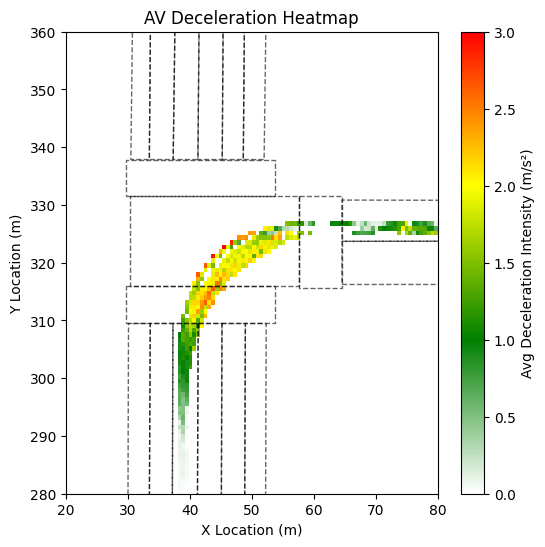

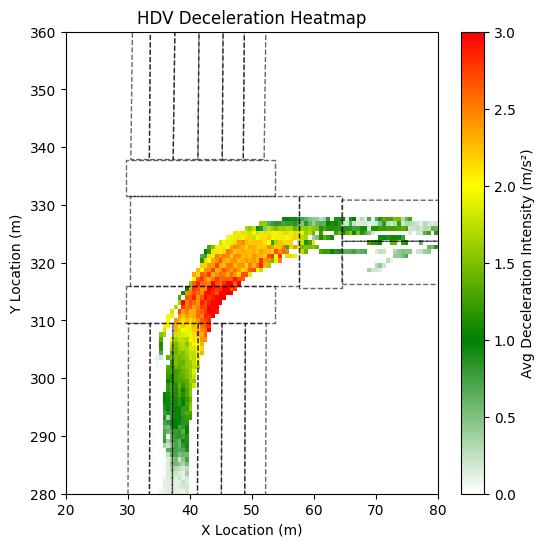

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Loading the full transformed dataset
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Keeping only AVs and HDVs (types 4 and 3)
vehicles = tgsim[tgsim["type_most_common"].isin([3, 4])]

# Only agents that made the 29 → 15 left turn are of interest here
ids_in_29 = set(vehicles[vehicles["lane_kf"] == 29]["id"])
ids_in_15 = set(vehicles[vehicles["lane_kf"] == 15]["id"])
left_turn_ids = ids_in_29 & ids_in_15  # Intersection: vehicles that were in both

left_turn_data = vehicles[vehicles["id"].isin(left_turn_ids)].copy()

# Filtering to decelerating segments — if acc and velocity oppose in any direction
decel_data = left_turn_data[
    ((left_turn_data['speed_kf_x'] > 0) & (left_turn_data['acceleration_kf_x'] < 0)) |
    ((left_turn_data['speed_kf_x'] < 0) & (left_turn_data['acceleration_kf_x'] > 0)) |
    ((left_turn_data['speed_kf_y'] > 0) & (left_turn_data['acceleration_kf_y'] < 0)) |
    ((left_turn_data['speed_kf_y'] < 0) & (left_turn_data['acceleration_kf_y'] > 0))
]

# Zooming into the top-right quadrant of the intersection (where 25 to 29 happens)
decel_data = decel_data[(decel_data['xloc_kf'] < 125) & (decel_data['yloc_kf'] > 250)]

# Splitting AVs and HDVs (AV = 4, HDV = 3)
av_data = decel_data[decel_data["type_most_common"] == 4]
hdv_data = decel_data[decel_data["type_most_common"] == 3]

# Creating a nice custom colormap (white to red, passing green and yellow)
cmap = mcolors.LinearSegmentedColormap.from_list("CustomMap", ["white", "green", "yellow", "red"])

# Plotting function with polygon overlay
def plot_heatmap(data, title, filename, polygons, acc_min=0, acc_max=3.0):
    if data.empty:
        print(f"No data for {title} — skipping.")
        return

    fig, ax = plt.subplots(figsize=(6, 6))

    # Deceleration intensity using Euclidean norm
    decel_mag = np.sqrt(data["acceleration_kf_x"]**2 + data["acceleration_kf_y"]**2)

    # Binned heatmap of total deceleration magnitude
    heatmap_sum, xedges, yedges = np.histogram2d(
        data["xloc_kf"], data["yloc_kf"],
        bins=[100, 100],
        range=[[20, 80], [280, 360]],
        weights=decel_mag
    )

    # Binned counts for averaging
    counts, _, _ = np.histogram2d(
        data["xloc_kf"], data["yloc_kf"],
        bins=[100, 100],
        range=[[20, 80], [280, 360]]
    )
    counts[counts == 0] = 1  # avoid division by zero

    # Normalized heatmap (average deceleration)
    heatmap_avg = heatmap_sum / counts

    # Plotting the heatmap
    img = ax.imshow(
        heatmap_avg.T, origin="lower",
        extent=[20, 80, 280, 360],
        cmap=cmap, aspect="auto", vmin=acc_min, vmax=acc_max
    )

    cbar = plt.colorbar(img)
    cbar.set_label("Avg Deceleration Intensity (m/s²)")
    cbar.ax.tick_params()

    # Overlaying polygons
    for lane_id, polygon in polygons_tr_m.items():
        if not polygon:
            continue
        polygon_closed = polygon + [polygon[0]]  # Close the loop
        x_poly, y_poly = zip(*polygon_closed)
        ax.plot(x_poly, y_poly, linestyle="--", linewidth=1, color="black", alpha=0.6)

    ax.set_xlim([20, 80])
    ax.set_ylim([280, 360])
    ax.set_xlabel("X Location (m)")
    ax.set_ylabel("Y Location (m)")
    ax.set_title(title)
    plt.savefig(filename, dpi=300)
    plt.show()

# Calling the updated plotting function with polygon overlay
plot_heatmap(av_data, "AV Deceleration Heatmap", "heatmap_av_left_turn.png", polygons_tr_m)
plot_heatmap(hdv_data, "HDV Deceleration Heatmap", "heatmap_hdv_left_turn.png", polygons_tr_m)


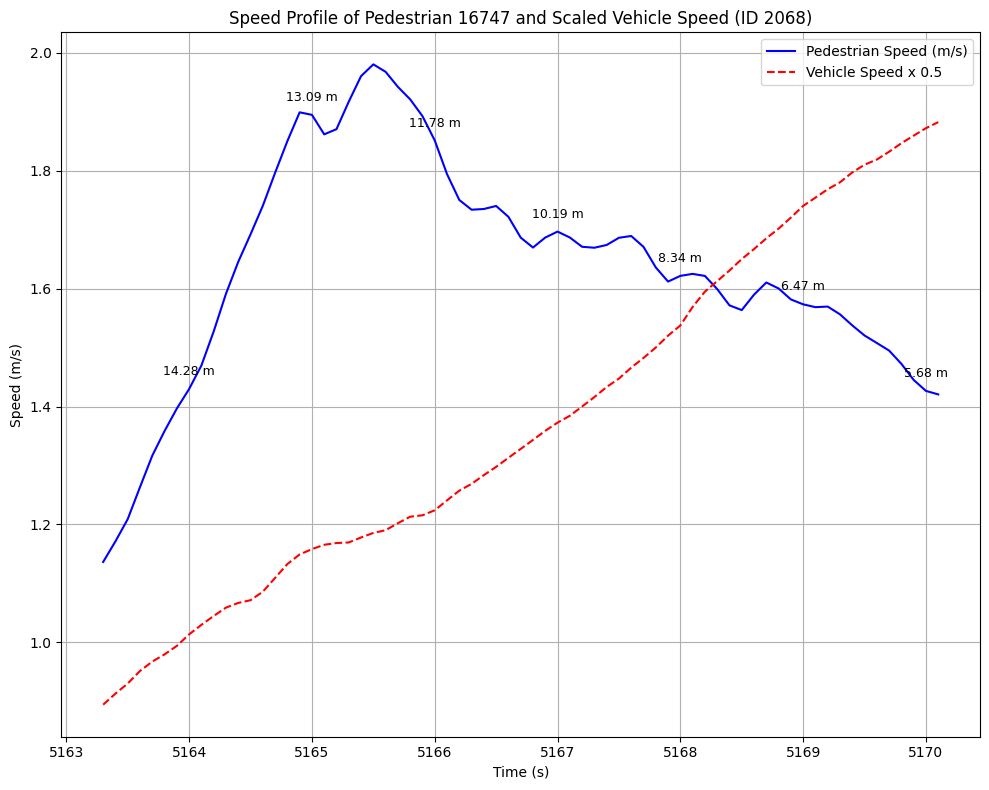

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Set parameters
ped_id = 16747
agent_id = 2068
start_time = 5150
end_time = 5180

# Filter data
ped_df = df[(df["id"] == ped_id) & (df["time"] >= start_time) & (df["time"] <= end_time)].copy()
agent_df = df[(df["id"] == agent_id) & (df["time"].isin(ped_df["time"]))].copy()

# Sort and reset index
ped_df.sort_values("time", inplace=True)
agent_df.set_index("time", inplace=True)
ped_df.set_index("time", inplace=True)

# Compute pedestrian and agent speed
ped_df["speed_mag"] = np.sqrt(ped_df["speed_kf_x"]**2 + ped_df["speed_kf_y"]**2)
ped_df["veh_speed_scaled"] = np.sqrt(agent_df["speed_kf_x"]**2 + agent_df["speed_kf_y"]**2) * 0.5

# Compute distance to agent
dx = ped_df["xloc_kf"] - agent_df["xloc_kf"]
dy = ped_df["yloc_kf"] - agent_df["yloc_kf"]
ped_df["distance_to_LT_agent"] = np.sqrt(dx**2 + dy**2)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(ped_df.index, ped_df["speed_mag"], label="Pedestrian Speed (m/s)", color="blue")
ax.plot(ped_df.index, ped_df["veh_speed_scaled"], label="Vehicle Speed x 0.5", color="red", linestyle="--")

# Add distance labels every 1 seconds
for t in range(start_time + 1, end_time):
    if t in ped_df.index:
        d = ped_df.loc[t, "distance_to_LT_agent"]
        s = ped_df.loc[t, "speed_mag"]
        ax.annotate(f"{d:.2f} m", (t, s), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# Labels and styling
ax.set_title(f"Speed Profile of Pedestrian {ped_id} and Scaled Vehicle Speed (ID {agent_id})")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Speed (m/s)")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


C:\Users\msela\AppData\Local\Temp\ipykernel_26124\1868578482.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


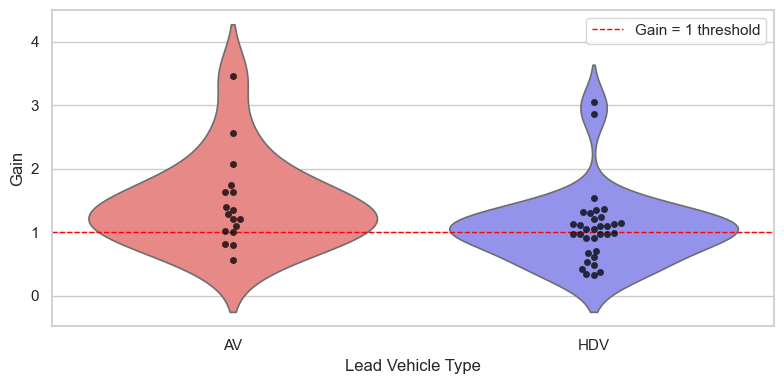

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading datasets
gain_df_av = pd.read_csv("AV_String_Stability_Results.csv")
gain_df_hdv = pd.read_csv("HDV_String_Stability_Results.csv")

# Defining lead types
gain_df_av["lead_type"] = "AV"
gain_df_hdv["lead_type"] = "HDV"

# Combining
full_gain_df = pd.concat([gain_df_av, gain_df_hdv], ignore_index=True)

# Filtering to only position 1 followers
df_pos1 = full_gain_df[full_gain_df["platoon_pos"] == 1].copy()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))

custom_palette = {
    "HDV": "#8484FB",  # Bluer, slightly brighter
    "AV": "#F77977"    # Shinier, milkier red
}


# Violin plot with updated colors
sns.violinplot(
    data=df_pos1,
    x="lead_type",
    y="gain",
    inner=None,
    linewidth=1.2,
    palette=custom_palette
)

# Swarm plot (black points)
sns.swarmplot(
    data=df_pos1,
    x="lead_type",
    y="gain",
    color='black',
    size=5,
    alpha=0.75
)

# Threshold line
plt.axhline(1.0, color='red', linestyle='--', linewidth=1, label='Gain = 1 threshold')

# Labels and legend
plt.ylabel("Gain")
plt.xlabel("Lead Vehicle Type")
plt.legend()
plt.tight_layout()
plt.show()


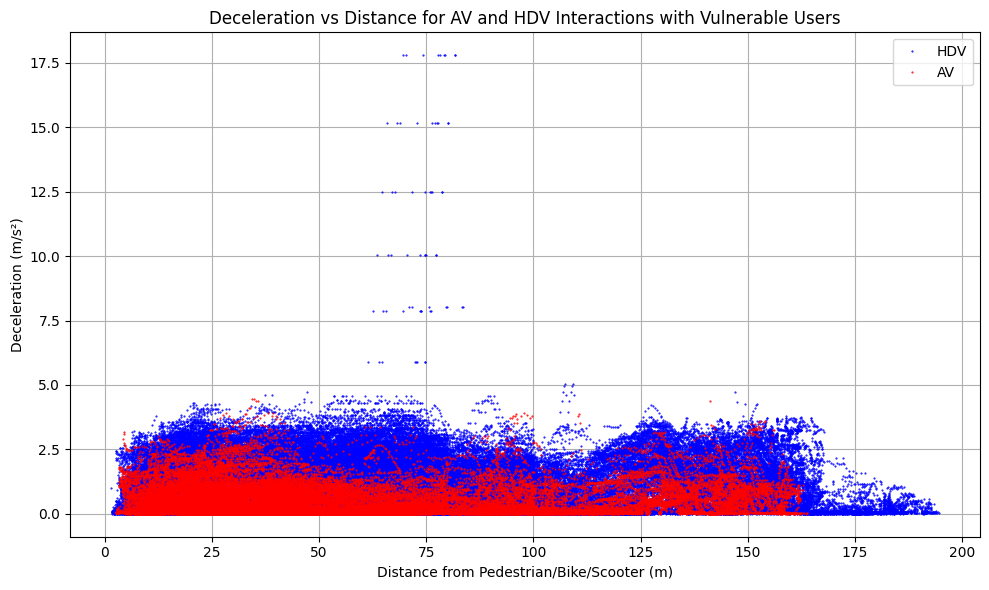

In [79]:
# This is a scatter plot for deceleration vs ped/bike/scooter distance for all left turning AV's and HDVs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# Load datasets
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

with open("AV_Detection_Details.json", "r") as f:
    av_det = pd.DataFrame(json.load(f))

with open("HDV_Detection_Details.json", "r") as f:
    hdv_det = pd.DataFrame(json.load(f))

# Filter for only pedestrian (0), bike (1), or scooter (2) interactions
target_types = [0, 1, 2]
tgsim['speed_mag'] = np.sqrt(tgsim['speed_kf_x']**2 + tgsim['speed_kf_y']**2)
tgsim_filtered = tgsim[(tgsim["type_most_common"].isin(target_types)) & (tgsim['speed_mag'] > 0.2)] # filtering for type and marginal speed

# AV Interactions 
df_av = av_det.merge(tgsim, left_on=["time", "av_id"], right_on=["time", "id"], suffixes=("", "_ego"))
df_av = df_av.merge(tgsim_filtered, left_on=["time", "agent_id"], right_on=["time", "id"], suffixes=("", "_target"))

# Compute AV deceleration only when opposing motion
av_valid = (
    (np.sign(df_av["speed_kf_x"]) != np.sign(df_av["acceleration_kf_x"])) |
    (np.sign(df_av["speed_kf_y"]) != np.sign(df_av["acceleration_kf_y"]))
)
df_av = df_av[av_valid].copy()
df_av["deceleration"] = np.sqrt(df_av["acceleration_kf_x"]**2 + df_av["acceleration_kf_y"]**2)
av_scatter = df_av[["distance", "deceleration"]]

# HDV Interactions 
df_hdv = hdv_det.merge(tgsim, left_on=["time", "hdv_id"], right_on=["time", "id"], suffixes=("", "_ego"))
df_hdv = df_hdv.merge(tgsim_filtered, left_on=["time", "agent_id"], right_on=["time", "id"], suffixes=("", "_target"))

# Compute HDV deceleration only when opposing motion
hdv_valid = (
    (np.sign(df_hdv["speed_kf_x"]) != np.sign(df_hdv["acceleration_kf_x"])) |
    (np.sign(df_hdv["speed_kf_y"]) != np.sign(df_hdv["acceleration_kf_y"]))
)
df_hdv = df_hdv[hdv_valid].copy()
df_hdv["deceleration"] = np.sqrt(df_hdv["acceleration_kf_x"]**2 + df_hdv["acceleration_kf_y"]**2)
hdv_scatter = df_hdv[["distance", "deceleration"]]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hdv_scatter["distance"], hdv_scatter["deceleration"], 'b.', markersize=1, label="HDV")
plt.plot(av_scatter["distance"], av_scatter["deceleration"], 'r.', markersize=1, label="AV")

plt.xlabel("Distance from Pedestrian/Bike/Scooter (m)")
plt.ylabel("Deceleration (m/s²)")
plt.title("Deceleration vs Distance for AV and HDV Interactions with Vulnerable Users")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Deceleration_vs_Distance_AV_HDV.png", dpi=300)
plt.show()


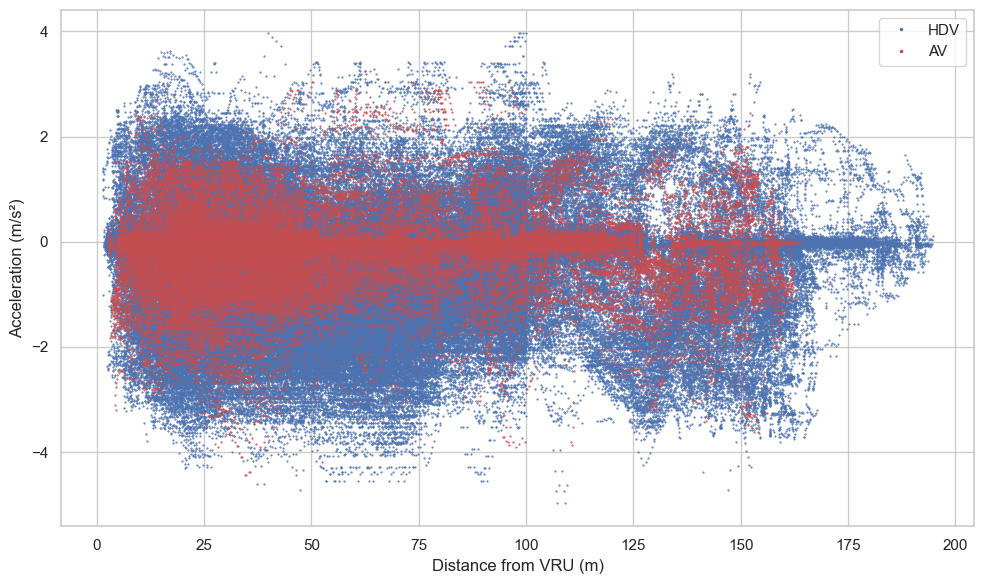

In [25]:
# This is the same scatter plot, but for both acceleration and deceleration vs ped/bike/scooter distance for all left turning AV's and HDVs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import json

# Load datasets
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

with open("AV_Detection_Details.json", "r") as f:
    av_det = pd.DataFrame(json.load(f))

with open("HDV_Detection_Details.json", "r") as f:
    hdv_det = pd.DataFrame(json.load(f))

# Calculating speed magnitude
tgsim['speed_mag'] = np.sqrt(tgsim['speed_kf_x']**2 + tgsim['speed_kf_y']**2)

# Now creating a function for acceleration magnitude with a sign 
def acc_calc(row):
    if (np.sign(row["speed_kf_x"]) != np.sign(row["acceleration_kf_x"])) or \
       (np.sign(row["speed_kf_y"]) != np.sign(row["acceleration_kf_y"])):
        acceleration = -1 * np.sqrt(row["acceleration_kf_x"]**2 + row["acceleration_kf_y"]**2)
    else:
        acceleration = np.sqrt(row["acceleration_kf_x"]**2 + row["acceleration_kf_y"]**2)
    
    return acceleration

tgsim['acceleration'] = tgsim.apply(acc_calc, axis=1)

# Filtering for only acceleration values between -5 and 5 m/s2
tgsim = tgsim[(tgsim["acceleration"]>=-5) & (tgsim["acceleration"]<=5)]

# Filtering for only pedestrian (0), bike (1), or scooter (2) interactions
target_types = [0, 1, 2]
tgsim_filtered = tgsim[(tgsim["type_most_common"].isin(target_types)) & (tgsim['speed_mag'] > 0.2)] # filtering for type and marginal speed

# AV Interactions 
df_av = av_det.merge(tgsim, left_on=["time", "av_id"], right_on=["time", "id"], suffixes=("", "_ego"))
df_av = df_av.merge(tgsim_filtered, left_on=["time", "agent_id"], right_on=["time", "id"], suffixes=("", "_target"))

av_scatter = df_av[["distance", "acceleration"]]

# HDV Interactions 
df_hdv = hdv_det.merge(tgsim, left_on=["time", "hdv_id"], right_on=["time", "id"], suffixes=("", "_ego"))
df_hdv = df_hdv.merge(tgsim_filtered, left_on=["time", "agent_id"], right_on=["time", "id"], suffixes=("", "_target"))

hdv_scatter = df_hdv[["distance", "acceleration"]]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hdv_scatter["distance"], hdv_scatter["acceleration"], 'b.', markersize=1, label="HDV")
plt.plot(av_scatter["distance"], av_scatter["acceleration"], 'r.', markersize=1, label="AV")
plt.xlabel("Distance from VRU (m)")
plt.ylabel("Acceleration (m/s²)")
plt.legend(markerscale=3)  
plt.grid(True)
plt.tight_layout()
plt.show()

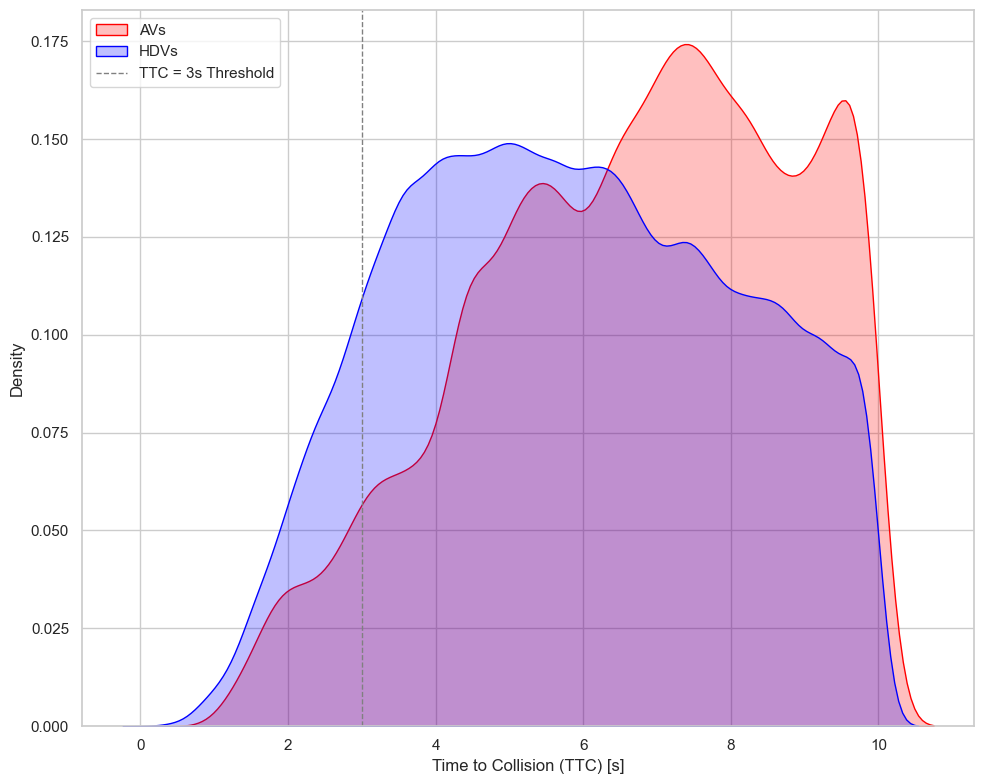

In [16]:
# Now comparing TTC distribution (AV vs HDV) for VRU interactions only

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load TTC datasets
av_ttc = pd.read_csv("AV_TTC_Analysis.csv")
hdv_ttc = pd.read_csv("HDV_TTC_Analysis.csv")
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Merge to get type_most_common of agent
av_ttc = av_ttc.merge(tgsim[["time", "id", "type_most_common"]], left_on=["time", "agent_id"], right_on=["time", "id"])
hdv_ttc = hdv_ttc.merge(tgsim[["time", "id", "type_most_common"]], left_on=["time", "agent_id"], right_on=["time", "id"])

# Filter for VRUs only: pedestrians (0), bicycles (1), scooters (2)
vru_types = [0, 1, 2]
av_ttc = av_ttc[av_ttc["type_most_common"].isin(vru_types)]
hdv_ttc = hdv_ttc[hdv_ttc["type_most_common"].isin(vru_types)]

# Filter out infinite or very large TTCs to focus on risk zone
ttc_threshold = 10  # seconds
av_ttc = av_ttc[np.isfinite(av_ttc["TTC"]) & (av_ttc["TTC"] <= ttc_threshold)]
hdv_ttc = hdv_ttc[np.isfinite(hdv_ttc["TTC"]) & (hdv_ttc["TTC"] <= ttc_threshold)]

# Create the KDE plot
plt.figure(figsize=(10, 8))
sns.kdeplot(av_ttc["TTC"], label="AVs", color="red", fill=True, bw_adjust=0.7)
sns.kdeplot(hdv_ttc["TTC"], label="HDVs", color="blue", fill=True, bw_adjust=0.7)

# Add threshold line (e.g., TTC = 3 seconds)
plt.axvline(3, color='gray', linestyle='--', linewidth=1, label="TTC = 3s Threshold")

# Labels and legend
plt.xlabel("Time to Collision (TTC) [s]")
plt.ylabel("Density")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

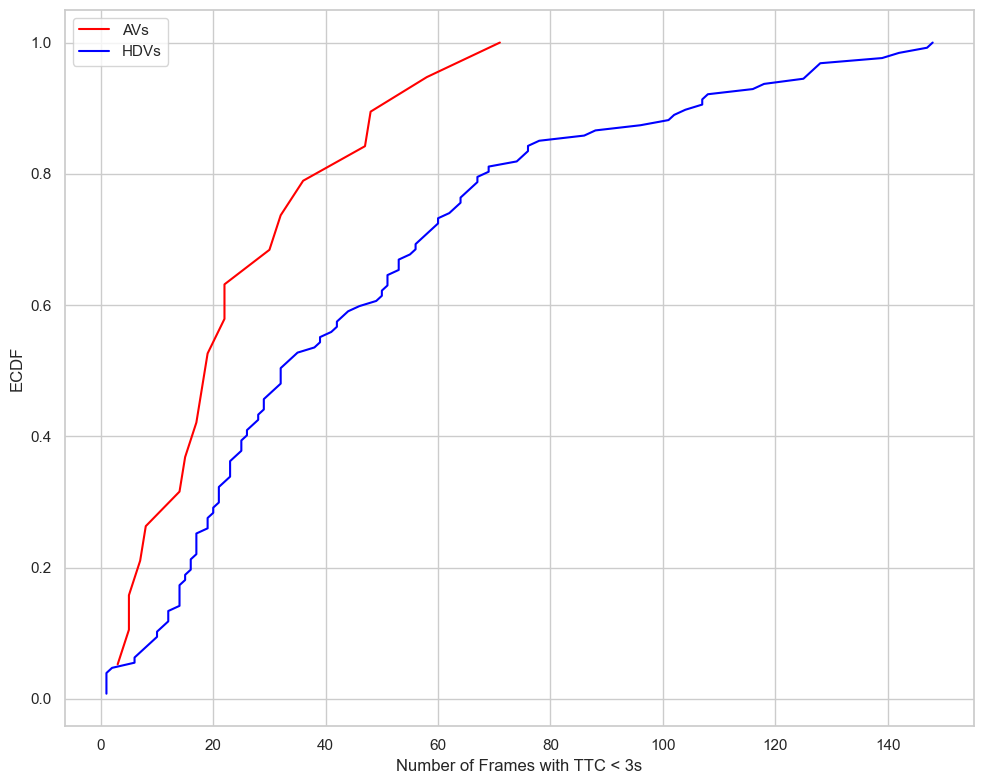

In [17]:
# Visualizing Empirical Cumulative Distribution Function for TTCs less than 3 s

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading datasets
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")
av_ttc = pd.read_csv("AV_TTC_Analysis.csv")
hdv_ttc = pd.read_csv("HDV_TTC_Analysis.csv")

# Get VRU IDs
vru_ids = tgsim[tgsim["type_most_common"].isin([0, 1, 2])]["id"].unique()

# Filter TTC datasets for VRU interactions only
av_vru = av_ttc[av_ttc["agent_id"].isin(vru_ids) & np.isfinite(av_ttc["TTC"])]
hdv_vru = hdv_ttc[hdv_ttc["agent_id"].isin(vru_ids) & np.isfinite(hdv_ttc["TTC"])]

# Cumulative Risk Metric (Frames with TTC < 3s)

# Counting number of 0.1s frames with TTC < 3s per vehicle
av_risk = av_vru[av_vru["TTC"] < 3].groupby("av_id").size()
hdv_risk = hdv_vru[hdv_vru["TTC"] < 3].groupby("hdv_id").size()

# ECDF plot
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

x_av, y_av = ecdf(av_risk)
x_hdv, y_hdv = ecdf(hdv_risk)

plt.figure(figsize=(10, 8))
plt.plot(x_av, y_av, label="AVs", color="red")
plt.plot(x_hdv, y_hdv, label="HDVs", color="blue")
plt.xlabel("Number of Frames with TTC < 3s")
plt.ylabel("ECDF")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

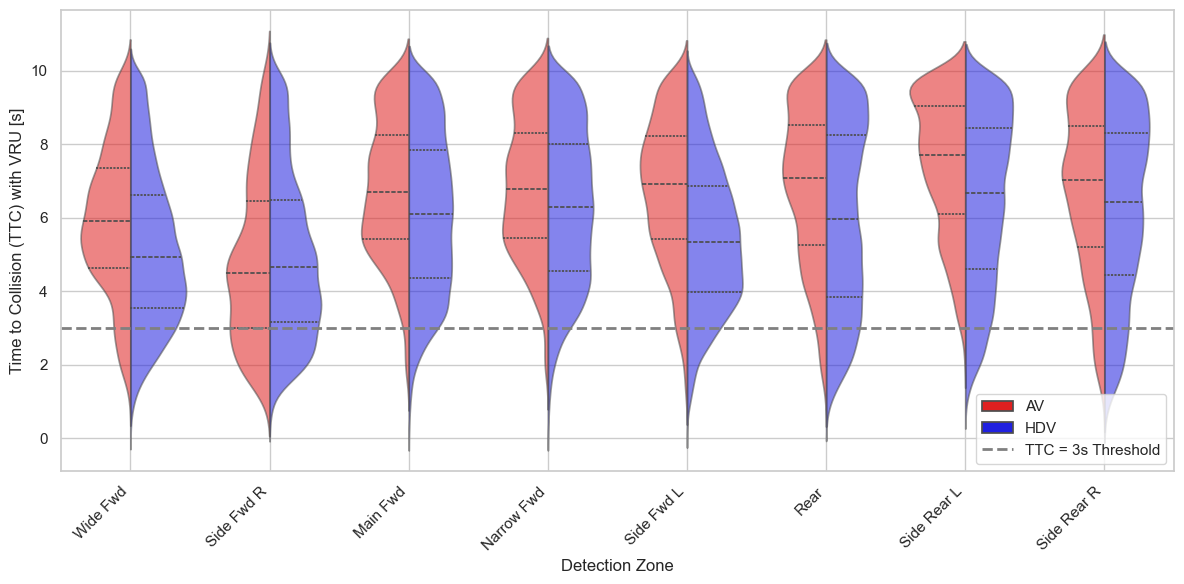

In [18]:
# Comparing AVs and HDVs in terms of TTC in each detection zone. 
# Note: since this is a left turn, front zones seem to be the only relevant ones

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading TTC and original datasets
av = pd.read_csv("AV_TTC_Analysis.csv")
hdv = pd.read_csv("HDV_TTC_Analysis.csv")
tgsim = pd.read_csv("Transformed_TGSIM_Foggy_Bottom.csv")

# Merging and filtering for VRUs
vru_types = [0, 1, 2]
av = av.merge(tgsim[["time", "id", "type_most_common"]], left_on=["time", "agent_id"], right_on=["time", "id"])
hdv = hdv.merge(tgsim[["time", "id", "type_most_common"]], left_on=["time", "agent_id"], right_on=["time", "id"])
av = av[av["type_most_common"].isin(vru_types)]
hdv = hdv[hdv["type_most_common"].isin(vru_types)]

# Filtering out infinite or large TTCs
av = av[np.isfinite(av["TTC"]) & (av["TTC"] <= 10)]
hdv = hdv[np.isfinite(hdv["TTC"]) & (hdv["TTC"] <= 10)]

# Ensuring zones are treated as lists
av["zones"] = av["zones"].apply(lambda z: eval(z) if isinstance(z, str) else z)
hdv["zones"] = hdv["zones"].apply(lambda z: eval(z) if isinstance(z, str) else z)

# Exploding so that each zone gets its own row. this is because we want zones to be plotted separately rather than combincations of zones
av = av.explode("zones")
hdv = hdv.explode("zones")

# Assigning vehicle type. This helps in plotting. 
av["vehicle_type"] = "AV"
hdv["vehicle_type"] = "HDV"

# Combining datasets
df_all = pd.concat([av[["TTC", "zones", "vehicle_type"]], hdv[["TTC", "zones", "vehicle_type"]]])

# Dropping any NaNs that might sneak in
df_all = df_all.dropna(subset=["zones", "TTC"])

# Plotting our violins
custom_palette = {"AV": "red", "HDV": "blue"}

plt.figure(figsize=(12, 6))
ax = sns.violinplot(
    data=df_all,
    x="zones",
    y="TTC",
    hue="vehicle_type",
    split=True,
    inner="quartile",
    palette=custom_palette
)

for violin in ax.collections:
    violin.set_alpha(0.55)  # Set transparency to 60%

plt.axhline(3, color="gray", linewidth=2, linestyle="--", label="TTC = 3s Threshold")
plt.ylabel("Time to Collision (TTC) with VRU [s]")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Detection Zone")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


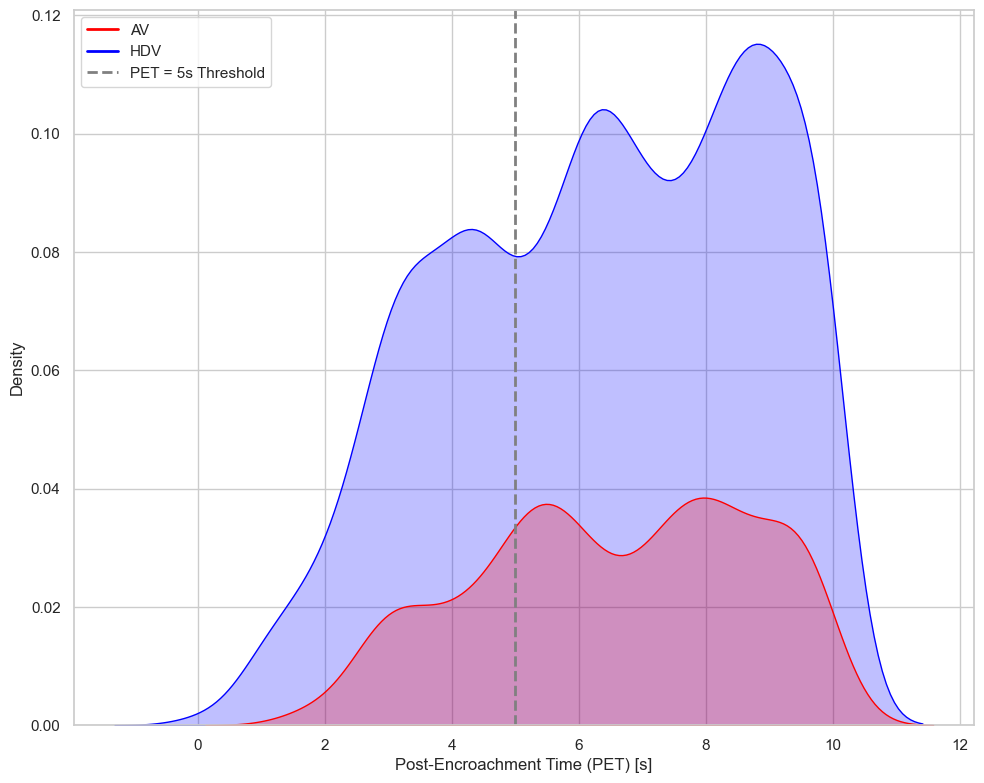

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load PET datasets
av_pet = pd.read_csv("AV_PET_Analysis_5m.csv")
hdv_pet = pd.read_csv("HDV_PET_Analysis_5m.csv")

# Add vehicle type column
av_pet["vehicle_type"] = "AV"
hdv_pet["vehicle_type"] = "HDV"

# Combine datasets
df_all = pd.concat([av_pet[["PET", "vehicle_type"]], hdv_pet[["PET", "vehicle_type"]]])

# Filter PET values to a reasonable range (e.g., 0 to 10 seconds)
df_all = df_all[(df_all["PET"] >= 0) & (df_all["PET"] <= 10)]

# Plot KDE
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df_all, x="PET", hue="vehicle_type", fill=True, bw_adjust=0.7, palette={"AV": "red", "HDV": "blue"})

# Threshold line
plt.axvline(5, color='gray', linestyle='--', linewidth=2)

# Custom legend handles
legend_elements = [
    Line2D([0], [0], color='red', lw=2, label='AV'),
    Line2D([0], [0], color='blue', lw=2, label='HDV'),
    Line2D([0], [0], color='gray', lw=2, linestyle='--', label='PET = 5s Threshold')
]

plt.xlabel("Post-Encroachment Time (PET) [s]")
plt.ylabel("Density")
plt.legend(handles=legend_elements)
plt.grid(True)
plt.tight_layout()
plt.show()


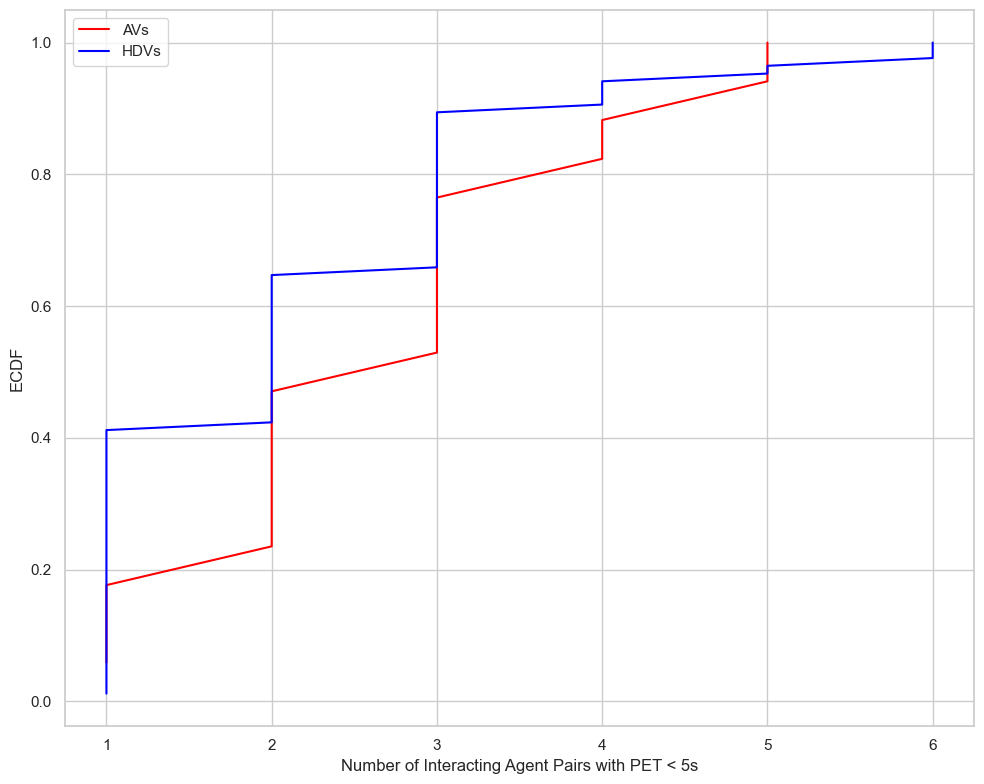

In [20]:
# Visualizing Empirical Cumulative Distribution Function for PETs less than 5 s

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load PET datasets
av_pet = pd.read_csv("AV_PET_Analysis_5m.csv")
hdv_pet = pd.read_csv("HDV_PET_Analysis_5m.csv")

# Filter for PET < 5 seconds
av_risk_pet = av_pet[av_pet["PET"] < 5].groupby("av_id").size()
hdv_risk_pet = hdv_pet[hdv_pet["PET"] < 5].groupby("hdv_id").size()

# Define ECDF function
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

# Calculate ECDFs
x_av, y_av = ecdf(av_risk_pet)
x_hdv, y_hdv = ecdf(hdv_risk_pet)

# Plotting ECDF
plt.figure(figsize=(10, 8))
plt.plot(x_av, y_av, label="AVs", color="red")
plt.plot(x_hdv, y_hdv, label="HDVs", color="blue")

plt.xlabel("Number of Interacting Agent Pairs with PET < 5s")
plt.ylabel("ECDF")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


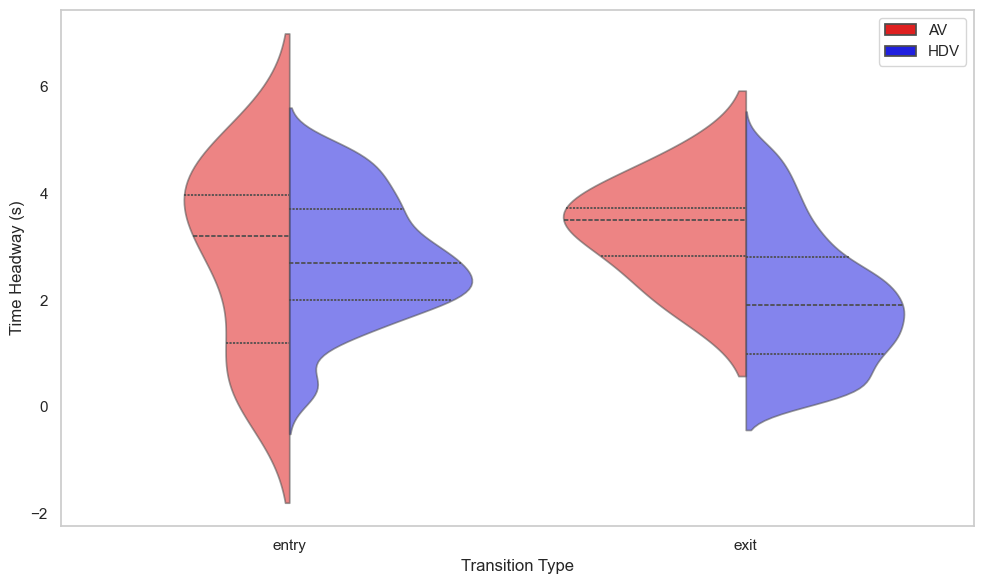

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and merge your headway data
av_df = pd.read_csv("AV_Intersection_Headways.csv")
hdv_df = pd.read_csv("HDV_Intersection_Headways.csv")

# Tag vehicle types
av_df["vehicle"] = "AV"
hdv_df["vehicle"] = "HDV"

# Combine
df = pd.concat([av_df, hdv_df], ignore_index=True)

# Add transition type
entry_pairs = [(25, 36), (29, 41), (15, 46), (34, 45)]
exit_pairs = [(2, 37), (1, 40), (3, 48), (4, 42)]

df["transition_type"] = df.apply(
    lambda row: "entry" if (row["source_lane"], row["target_lane"]) in entry_pairs
    else "exit" if (row["source_lane"], row["target_lane"]) in exit_pairs
    else "other",
    axis=1
)

# Filter to headways ≤ 5 seconds and valid transitions
df = df[(df["time_headway"] <= 5) & (df["transition_type"].isin(["entry", "exit"]))]

# --- VIOLIN PLOT: split by vehicle within each transition_type ---

custom_palette = {"AV": "red", "HDV": "blue"}

plt.figure(figsize=(10, 6))
ax = sns.violinplot(
    data=df,
    x="transition_type",
    y="time_headway",
    hue="vehicle",
    split=True,
    inner="quart",
    palette=custom_palette
)

for violin in ax.collections:
    violin.set_alpha(0.55)  # Set transparency to 60%


plt.xlabel("Transition Type")
plt.ylabel("Time Headway (s)")
plt.legend(loc="upper right")
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("Violin_AV_HDV_Headways_by_Transition.png")
plt.show()